In [ ]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/Supervised Learning Classification/Decision Tree/Personal Loan Project/Personal Loan Campaign Project.ipynb" --output "Personal Loan Campaign Project"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Supervised Learning Classification/Decision Tree/Personal Loan Project/Personal Loan Campaign Project.ipynb to html
[NbConvertApp] Writing 3811604 bytes to /content/drive/MyDrive/Colab Notebooks/Supervised Learning Classification/Decision Tree/Personal Loan Project/Personal Loan Campaign Project.html


#**Personal Loan Campaign - Problem Statement**

##**Background and Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

##**Objective**

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

##**Data Dictionary**
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

##**Importing the necessary packages**

In [ ]:
!pip install zipcodes # installing Zipcodes library .

# (Personal Loan| Logistic Regression& Decision Tree)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
!%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import zipcodes as zcode # to get zipcodes
import scipy.stats as stats

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option('display.max_columns', None)
# Sets the limit for the number of displayed rows
pd.set_option('display.max_rows', 200)

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get different metrics scores
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, plot_confusion_matrix, make_scorer,roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,)

# (Nishida)
# (Greatlearning Login)



/bin/bash: line 0: fg: no job control


**Read the dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Learning Classification/Decision Tree/Personal Loan Project/Loan_Modelling.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
loan = data.copy()

**View the first and last 5 rows of the dataset.**

In [ ]:
loan.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
loan.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

**Understand the shape of the dataset.**

In [ ]:
loan.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns of data

**Check the data types of the columns for the dataset.**

**Let's check the duplicate data. And if any, we should remove it.**

In [ ]:
loan[loan.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no duplicates in the dataset

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations -**

* All the independent variables except for CCAvg are int64 type.

**Summary of the dataset.**

In [ ]:
loan.sample(10) # randomly reordering dataset just to get a feel of the different values within the features

# (McKinney, p.211)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
3233  3234   46          20     111    95037       1    0.0          1   
3607  3608   41          15      62    90401       3    0.9          3   
4410  4411   39          14     153    91614       2    3.0          1   
163    164   28           4      70    91125       4    2.6          1   
2413  2414   60          34      31    91007       2    1.0          3   
4293  4294   63          38      41    90034       2    1.5          1   
1314  1315   32           6      73    94305       4    2.2          2   
3644  3645   59          33      41    91711       4    2.5          1   
1012  1013   50          25      40    95820       1    1.3          2   
3392  3393   32           7      58    92612       1    1.0          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
3233       329              0                   0           0       0   
3607         0              0                   0           0       0   
4410         0              0                   0           0       0   
163          0              0                   0           0       1   
2413         0              0                   0           0       0   
4293       173              0                   0           0       1   
1314         0              0                   0           0       0   
3644       174              0                   0           0       0   
1012         0              0                   0           0       1   
3392         0              0                   0           0       1   

      CreditCard  
3233           0  
3607           0  
4410           0  
163            0  
2413           0  
4293           1  
1314           0  
3644           0  
1012           1  
3392           0

In [ ]:
# checking for unique values in ID column
loan['ID'].nunique()

5000

* Since all the values in ID column are unique we can drop it

In [ ]:
loan.drop(['ID'], axis=1, inplace=True) # dropping 'ID' column

In [ ]:
loan.describe(include='all').T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

**Observations-**

* The average Age in dataset is 45.
* Experience has -3 for the min, need to explore more to understand how a customer can have negative years of professional experience.
* Income ranges from 8000 to 224000 dollars, 75% of the customers have income of 98000 or less.
* Average Family size if 2.396.
* Average spending on credit cards 'CCAvg', is ~1900 dollars.
* The average Customer has some form of education ~1.88.
* Lines of credit do not have a lot of data.

**Check for missing values**

In [ ]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing vaues in out dataset

**Creating a list of numerical columns**

In [ ]:
numeric_cols = loan.select_dtypes(include=[np.number]).columns
cat_cols = loan.describe(include=["int64"]).columns
print("Numeric Columns:    ", numeric_cols)

# (Greatlearning Login)

Numeric Columns:     Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


#**Data Preprocessing**

**Processing Zipcode**

In [ ]:
loan.ZIPCode.nunique() # checking for number of unique values in ZIPCode

# (Personal Loan| Logistic Regression& Decision Tree)

467

In [ ]:
# unique zipcodes
list_zipcode = loan.ZIPCode.unique()

# (Personal Loan| Logistic Regression& Decision Tree)

In [ ]:
# Creating a dictionary of county by using  zipcode library and matching method.
zip_code = {}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode

    zip_code.update({zipcode:county})

# (Personal Loan| Logistic Regression& Decision Tree)

In [ ]:
zip_code # Getting a list of county for each ZIPCode

# (Personal Loan| Logistic Regression& Decision Tree)

{90005: 'Los Angeles County',
 90007: 'Los Angeles County',
 90009: 'Los Angeles County',
 90011: 'Los Angeles County',
 90016: 'Los Angeles County',
 90018: 'Los Angeles County',
 90019: 'Los Angeles County',
 90024: 'Los Angeles County',
 90025: 'Los Angeles County',
 90027: 'Los Angeles County',
 90028: 'Los Angeles County',
 90029: 'Los Angeles County',
 90032: 'Los Angeles County',
 90033: 'Los Angeles County',
 90034: 'Los Angeles County',
 90035: 'Los Angeles County',
 90036: 'Los Angeles County',
 90037: 'Los Angeles County',
 90041: 'Los Angeles County',
 90044: 'Los Angeles County',
 90045: 'Los Angeles County',
 90048: 'Los Angeles County',
 90049: 'Los Angeles County',
 90057: 'Los Angeles County',
 90058: 'Los Angeles County',
 90059: 'Los Angeles County',
 90064: 'Los Angeles County',
 90065: 'Los Angeles County',
 90066: 'Los Angeles County',
 90068: 'Los Angeles County',
 90071: 'Los Angeles County',
 90073: 'Los Angeles County',
 90086: 'Los Angeles County',
 90089: 'L

* 96651, 93077, 92717, 92634 do not have a county name. Searching the internet I found the following Counties:

96651 = San Franisco County
93077 = Ventura County
92717 & 92634 = Orange County

In [ ]:
# Assigning ZIPCodes to correct county
zip_code.update({96651:'Orange County'})
zip_code.update({93077:'Orange County'})
zip_code.update({92717:'Orange County'})
zip_code.update({92634:'Orange County'})

# (Personal Loan| Logistic Regression& Decision Tree)


In [ ]:
# checking to see if assignment worked
zip_code

# (Personal Loan| Logistic Regression& Decision Tree)

{90005: 'Los Angeles County',
 90007: 'Los Angeles County',
 90009: 'Los Angeles County',
 90011: 'Los Angeles County',
 90016: 'Los Angeles County',
 90018: 'Los Angeles County',
 90019: 'Los Angeles County',
 90024: 'Los Angeles County',
 90025: 'Los Angeles County',
 90027: 'Los Angeles County',
 90028: 'Los Angeles County',
 90029: 'Los Angeles County',
 90032: 'Los Angeles County',
 90033: 'Los Angeles County',
 90034: 'Los Angeles County',
 90035: 'Los Angeles County',
 90036: 'Los Angeles County',
 90037: 'Los Angeles County',
 90041: 'Los Angeles County',
 90044: 'Los Angeles County',
 90045: 'Los Angeles County',
 90048: 'Los Angeles County',
 90049: 'Los Angeles County',
 90057: 'Los Angeles County',
 90058: 'Los Angeles County',
 90059: 'Los Angeles County',
 90064: 'Los Angeles County',
 90065: 'Los Angeles County',
 90066: 'Los Angeles County',
 90068: 'Los Angeles County',
 90071: 'Los Angeles County',
 90073: 'Los Angeles County',
 90086: 'Los Angeles County',
 90089: 'L

**All ZIPCodes are not assigned a county**

In [ ]:
# Code for changing ZIPCode to County
loan['County']=loan['ZIPCode'].map(zip_code)

# (Personal Loan| Logistic Regression& Decision Tree)

**Assigning counties to regions within California**

In [ ]:
# changing ZIPCode column to zip_code
counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',
'Ventura County':'Southern',
'San Bernardino County':'Southern',
'Contra Costa County':'Bay Area',
'Santa Cruz County':'Bay Area',
'Riverside County':'Southern',
'Kern County':'Southern',
'Marin County':'Bay Area',
'San Luis Obispo County':'Southern',
'Solano County':'Bay Area',
'Humboldt County':'Superior',
'Sonoma County':'Bay Area',
'Fresno County':'Central',
'Placer County':'Central',
'Butte County':'Superior',
'Shasta County':'Superior',
'El Dorado County':'Central',
'Stanislaus County':'Central',
'San Benito County':'Bay Area',
'San Joaquin County':'Central',
'Mendocino County':'Superior',
'Tuolumne County':'Central',
'Siskiyou County':'Superior',
'Trinity County':'Superior',
'Merced County':'Central',
'Lake County':'Superior',
'Napa County':'Bay Area',
'Imperial County':'Southern',
'Ventura County':'Southern',
'San Francisco County':'Bay Area',
}

# (Personal Loan| Logistic Regression& Decision Tree)

**Converting the county to regions**

In [ ]:
loan['Regions'] = loan['County'].map(counties)

# (“Region Map and Listing”)

In [ ]:
loan['Regions'].unique()

# (“Region Map and Listing”)

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central'], dtype=object)

* Five regions were created with the dtype of object

In [ ]:
loan.info() # checking dtype of newly added columns of County and Regions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  County              5000 non-null   object 
 14  Regions             5000 non-null   object 
dtypes: float64(1), int64(12), object(2)
memory usage: 586.1

* Newly added columns of County and Regions are dtype objects

In [ ]:
# Creating a list of numerical and categorical columns
numeric_cols = loan.select_dtypes(include=[np.number]).columns
cat_cols = loan.describe(include=["object"]).columns
print("Categorical Columns:     ", cat_cols)
print("Numeric Columns:    ", numeric_cols)

# (Greatlearning Login)

Categorical Columns:      Index(['County', 'Regions'], dtype='object')
Numeric Columns:     Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


* Negative values within Experience does not make sense so I will get rid of the negative values within the Experience column.

**Processing Experience due to the negative values**

In [ ]:
loan[loan['Experience']<0].sort_values(by='Experience',ascending=True)

# (Personal Loan| Logistic Regression& Decision Tree)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
4514   24          -3      41    91768       4   1.00          3         0   
2618   23          -3      55    92704       3   2.40          2       145   
4285   23          -3     149    93555       2   7.20          1         0   
3626   24          -3      28    90089       4   1.00          3         0   
2717   23          -2      45    95422       4   0.60          2         0   
2876   24          -2      80    91107       2   1.60          3       238   
3130   23          -2      82    92152       2   1.80          2         0   
2466   24          -2      80    94105       2   1.60          3         0   
3796   24          -2      50    94920       3   2.40          2         0   
2962   23          -2      81    91711       2   1.80          2         0   
793    24          -2     150    94720       2   2.00          1         0   
3887   24          -2     118    92634       2   7.20          1         0   
889    24          -2      82    91103       2   1.60          3         0   
597    24          -2     125    92835       2   7.20          1         0   
315    24          -2      51    90630       3   0.30          3         0   
451    28          -2      48    94132       2   1.75          3        89   
4116   24          -2     135    90065       2   7.20          1         0   
4481   25          -2      35    95045       4   1.00          3         0   
4411   23          -2      75    90291       2   1.80          2         0   
4015   25          -1     139    93106       2   2.00          1         0   
3157   23          -1      13    94720       4   1.00          1        84   
3279   26          -1      44    94901       1   2.00          2         0   
3284   25          -1     101    95819       4   2.10          3         0   
3292   25          -1      13    95616       4   0.40          1         0   
3394   25          -1     113    90089       4   2.10          3         0   
3425   23          -1      12    91605       4   1.00          1        90   
4088   29          -1      71    94801       2   1.75          3         0   
3824   23          -1      12    95064       4   1.00          1         0   
3946   25          -1      40    93117       3   2.40          2         0   
3076   29          -1      62    92672       2   1.75          3         0   
89     25          -1     113    94303       4   2.30          3         0   
2848   24          -1      78    94720       2   1.80          2         0   
226    24          -1      39    94085       2   1.70          2         0   
524    24          -1      75    93014       4   0.20          1         0   
536    25          -1      43    92173       3   2.40          2       176   
540    25          -1     109    94010       4   2.30          3       314   
576    25          -1      48    92870       3   0.30          3         0   
583    24          -1      38    95045       2   1.70          2         0   
649    25          -1      82    92677       4   2.10          3         0   
670    23          -1      61    92374       4   2.60          1       239   
2980   25          -1      53    94305       3   2.40          2         0   
686    24          -1      38    92612       4   0.60          2         0   
1173   24          -1      35    94305       2   1.70          2         0   
1428   25          -1      21    94583       4   0.40          1        90   
1522   25          -1     101    94720       4   2.30          3       256   
1905   25          -1     112    92507       2   2.00          1       241   
2102   25          -1      81    92647       2   1.60          3         0   
2430   23          -1      73    92120       4   2.60          1         0   
2545   25          -1      39    94720       3   2.40          2         0   
4582   25          -1      69    92691       3   0.30          3         0   
909    23          -1     14

In [ ]:
# Changing negative values to absoulte values for Experience.
loan.loc[loan['Experience']<0,'Experience']=np.abs(loan['Experience'])

# (Personal Loan| Logistic Regression& Decision Tree)

In [ ]:
loan[loan['Experience']==0]['Age'].describe() # getting descriptive summary for Age

# (Personal Loan| Logistic Regression& Decision Tree)

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Age, dtype: float64

In [ ]:
loan.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.134600    11.415189      0.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

* Now Experience does not have any negative values

#**EDA**

In [ ]:
for column in cat_cols:
    print(loan[column].value_counts())
    print("#" * 50)

    # (Greatlearning Login)

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              373
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou County              7
Tuolumne

* For Counties, Los Angeles County has the most values from the customers at 1095
* Top three regions are Bay Area, Southern, and Los Angeles Region

##**Observations needed here**

#**Univariate analysis**

**The below three functions need to be defined to carry out the Exploratory Data Analysis.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

       # (Greatlearning Login)

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

    # (Greatlearning Login)

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

       # (Greatlearning Login)

###**Observations on Age**

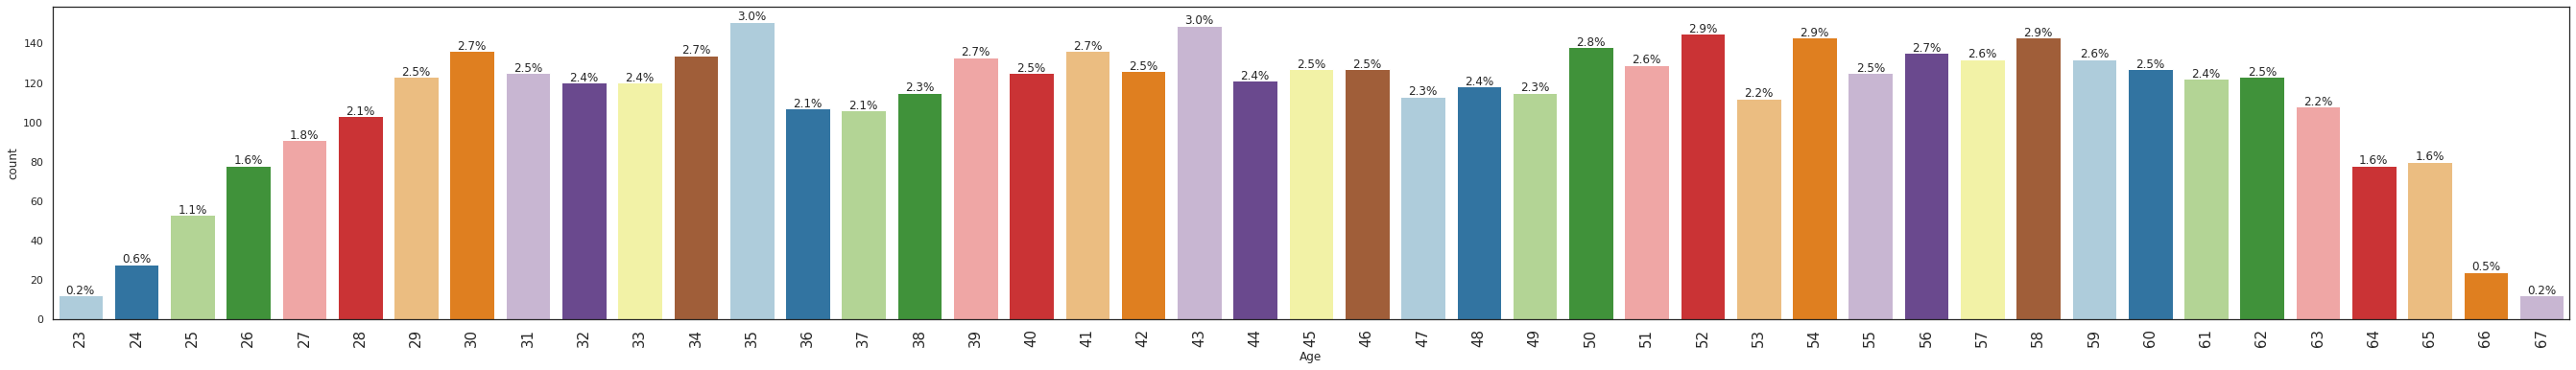

In [ ]:
labeled_barplot(loan, 'Age', perc=True)


* Ages 35 & 43 both have 3% of the population which is equivalent to 1500 customers or 3000 total, followed by 52 and 58 with 2.9% of the population which is equivalent to 1450 customers or 2900 total.

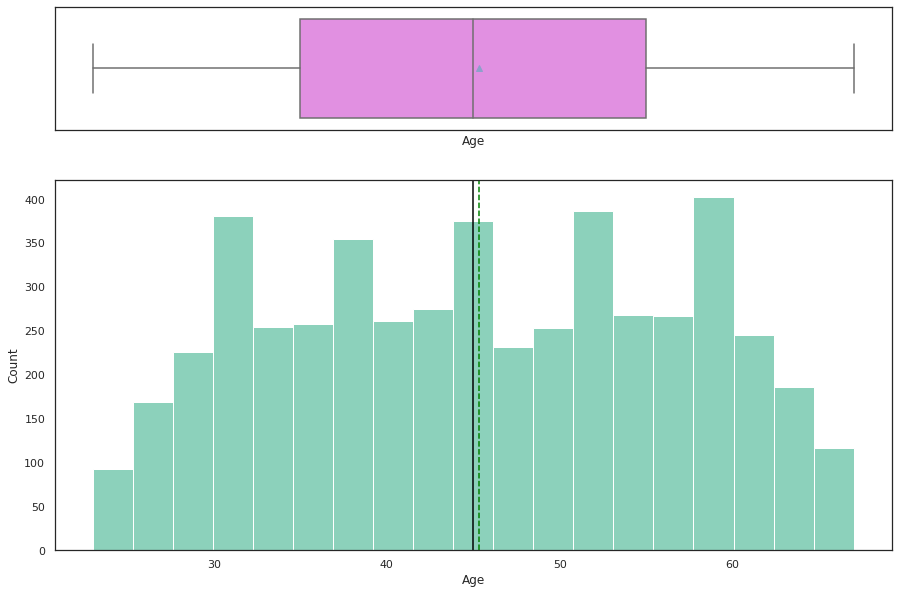

In [ ]:
histogram_boxplot(loan, 'Age')



* Age has five modes with mean and median close to each other.  

**Observations on Experience**

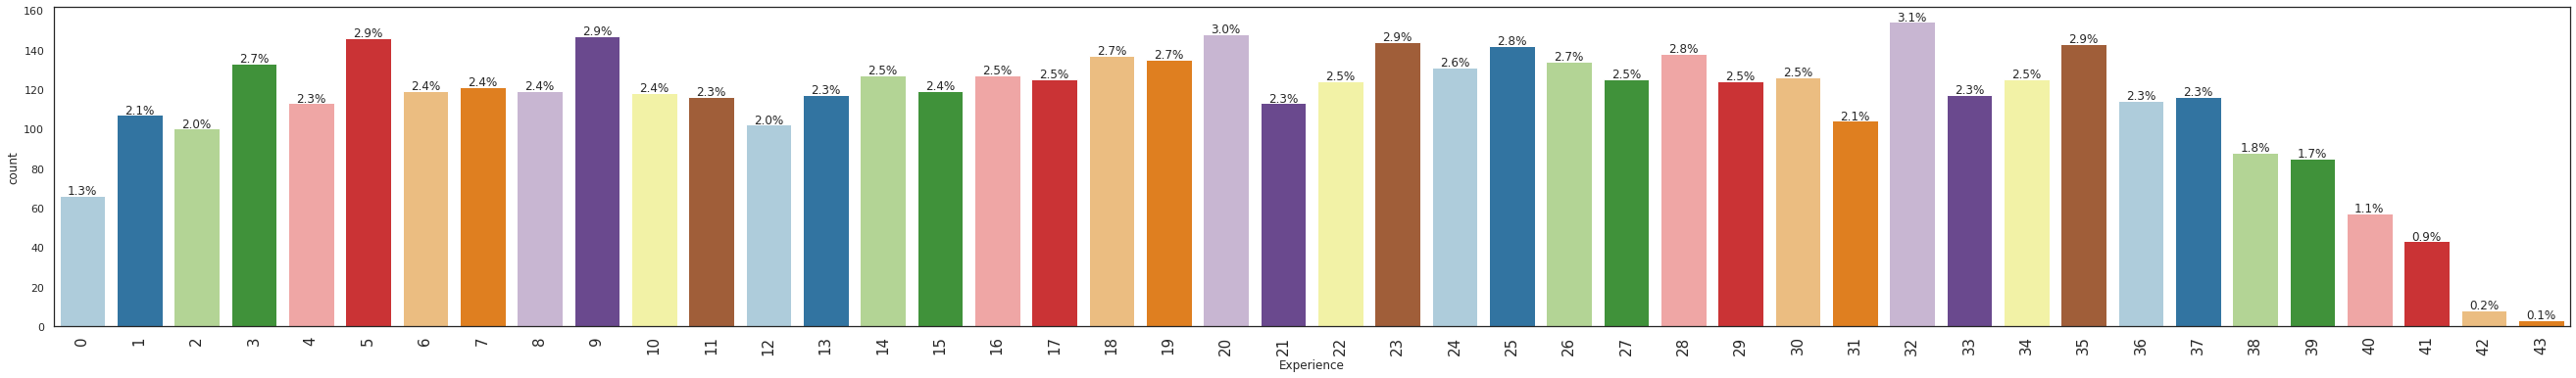

In [ ]:
labeled_barplot(loan, 'Experience', perc=True)

* 3.1% of the Customers have 32 years of professional experience, followed by 3.0% of the Customers have 20 years of professional experience.

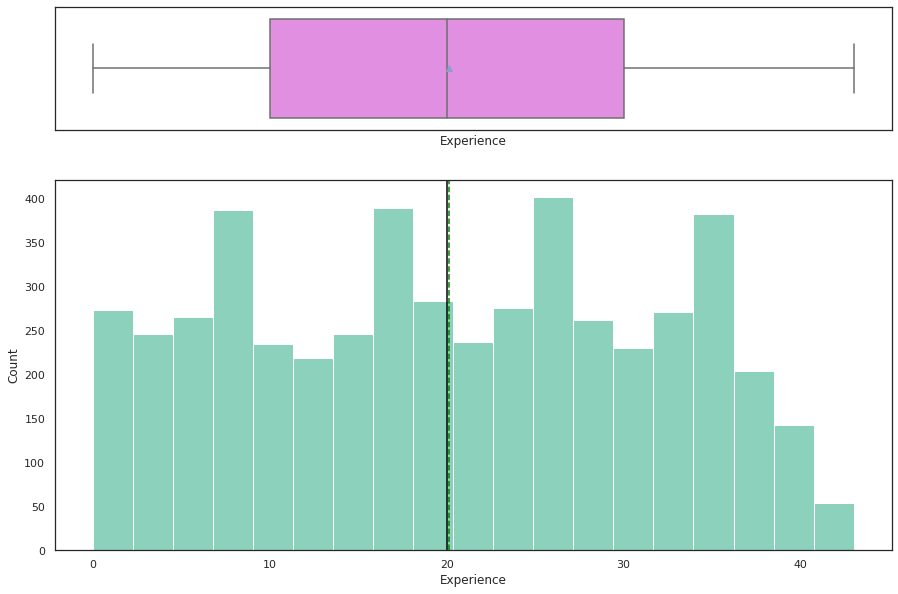

In [ ]:
histogram_boxplot(loan, 'Experience')

* Experience has five modes with mean and median close to each other.

**Observations on Income**

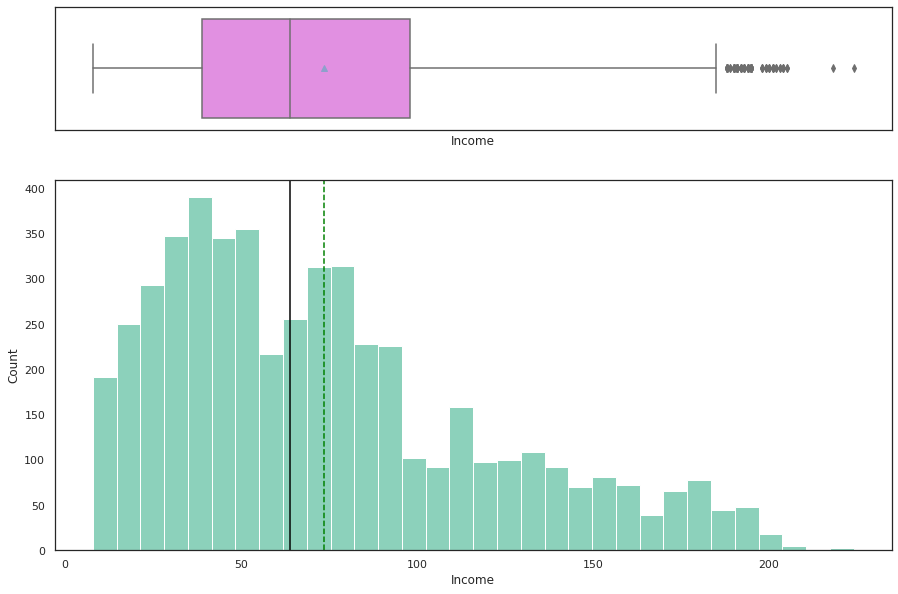

In [ ]:
histogram_boxplot(loan, 'Income')

* Income is rightly skewed with several outliers

In [ ]:
# Creating an income_status variable to determine which income status the customers land in.
loan["Income_Status"] = pd.cut(
    x=loan["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

# (Personal Loan| Logistic Regression& Decision Tree)

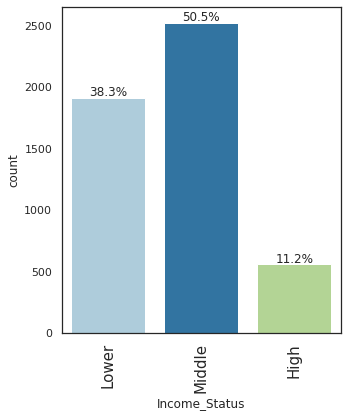

In [ ]:
labeled_barplot(loan, 'Income_Status', perc=True)

# (Personal Loan| Logistic Regression& Decision Tree)

* Middle income status has the most at 50.5%

**Observations on Family**

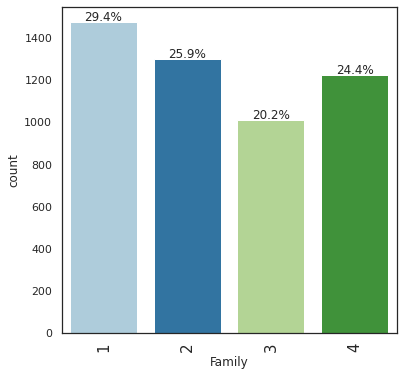

In [ ]:
labeled_barplot(loan, 'Family', perc=True)

* Single person family has the most at 29.4%, followed by two person family with 25.9%.

**Observations on CCAvg**

* 300 dollars has the most average spending per month with 4.8%, followed by 1000 dollars at 4.6%.

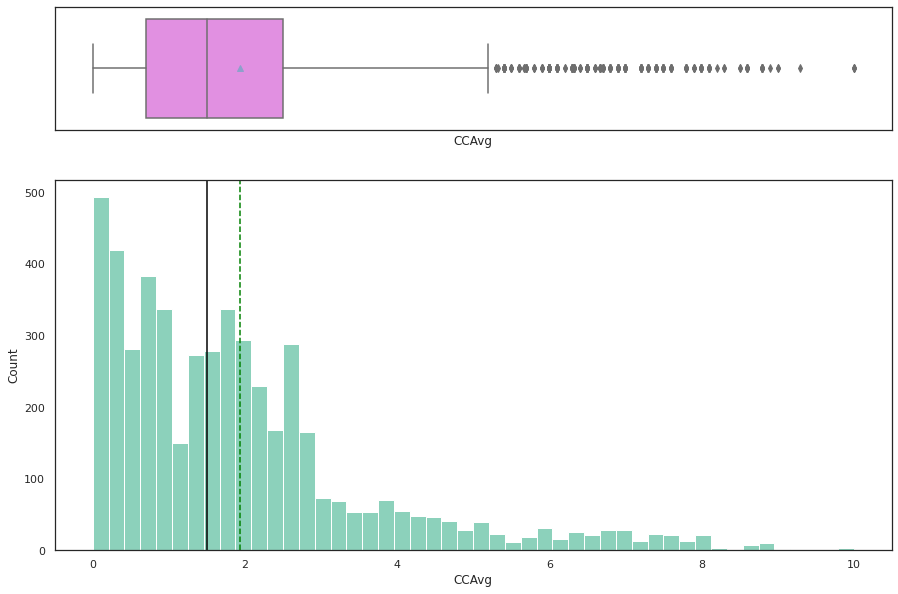

In [ ]:
histogram_boxplot(loan, 'CCAvg')

* CCAvg is right skewed with several outliers

In [ ]:
# Creating a spending_status variable to determine which income status the customers land in.
loan["Spending_Status"] = pd.cut( x= loan["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

# (Personal Loan| Logistic Regression& Decision Tree)

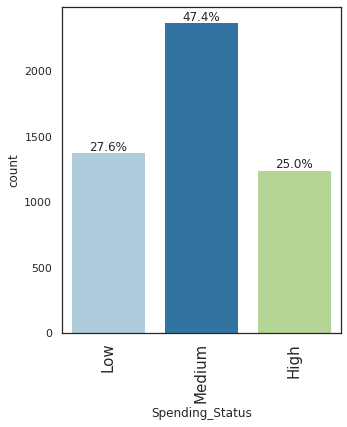

In [ ]:
labeled_barplot(loan, 'Spending_Status', perc=True)

# (Personal Loan| Logistic Regression& Decision Tree)

* Medium is spending the most at 47.4% comparable to their income status at 50.5%.

**Observations on Education**

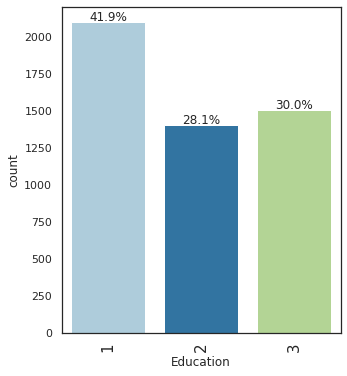

In [ ]:
labeled_barplot(loan, 'Education', perc=True)

* Undergrad has the most customers at 41.9%
* Advanced/Professional and Graduate are both close, with Advanced/Professional leading with 30.0%

**Observations on Mortgage**

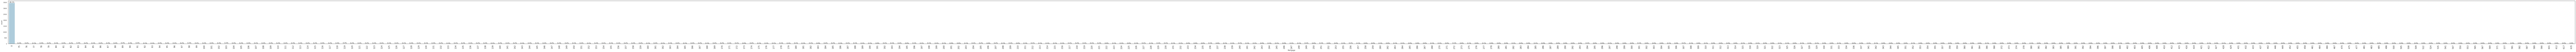

In [ ]:
labeled_barplot(loan, 'Mortgage', perc=True)

* 69.2% of the Customers do not have a mortgage.

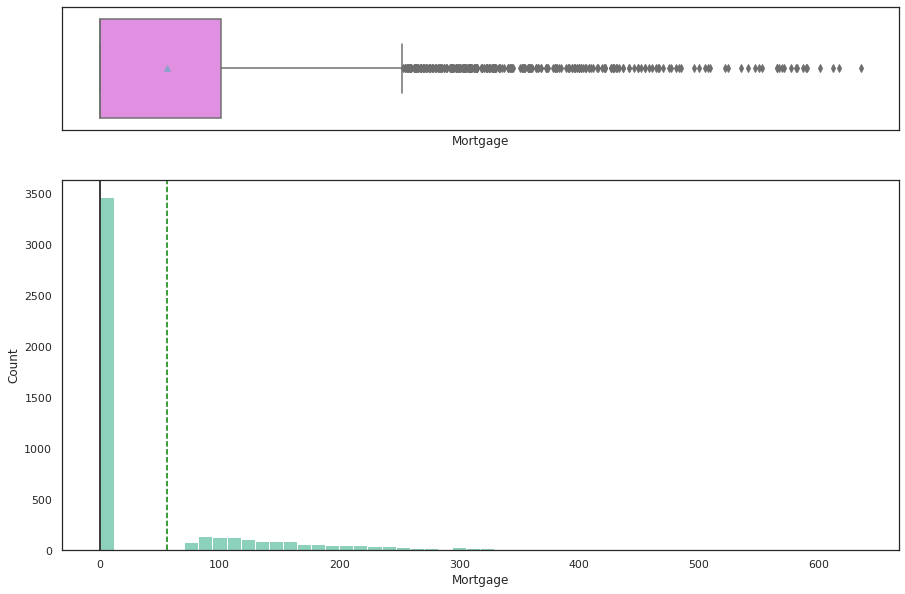

In [ ]:
histogram_boxplot(loan, 'Mortgage')

* Mortgage is right skewed with several outliers

**Observations on Personal_Loan**

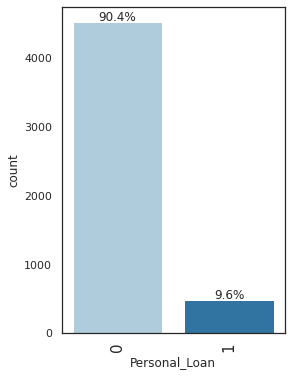

In [ ]:
labeled_barplot(loan, 'Personal_Loan', perc=True)

* 9.6% of the customers accepted the personal loan offered in the last campaign

* Personal loan is right skewed with one outlier

**Observations on Securities_Account**

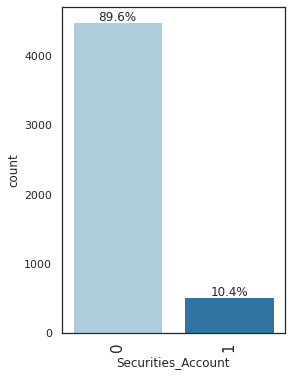

In [ ]:
labeled_barplot(loan, 'Securities_Account', perc=True)

* 10.4% of the customers have securities account with the bank.

**Observations on CD_Account**

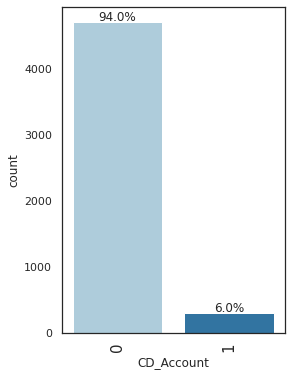

In [ ]:
labeled_barplot(loan, 'CD_Account', perc=True)

* 6% of the customers have CD accounts with the bank.

**Observations on Online**

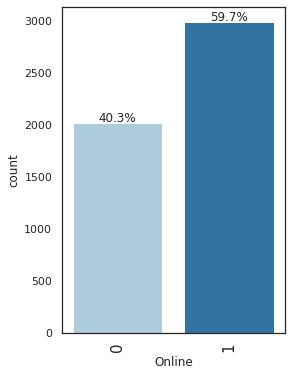

In [ ]:
labeled_barplot(loan, 'Online', perc=True)

* 59.7% of the customers use internet banking facilities.

**Observations on CreditCard**

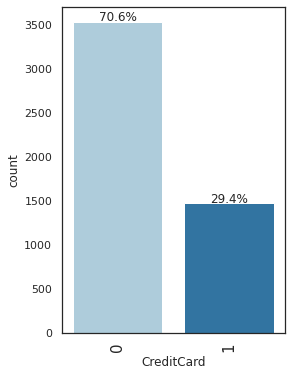

In [ ]:
labeled_barplot(loan, 'CreditCard', perc=True)

* 29.4% of the customers use a credit card issued by another bank (excluding All life Bank)

In [ ]:
loan.groupby(['County','Personal_Loan'])['Personal_Loan'].agg({'size'}).unstack() # checking to see which counties has accepted personal loans

# (Personal Loan| Logistic Regression& Decision Tree)

size       
Personal_Loan               0      1
County                              
Alameda County          456.0   44.0
Butte County             17.0    2.0
Contra Costa County      73.0   12.0
El Dorado County         16.0    1.0
Fresno County            24.0    2.0
Humboldt County          30.0    2.0
Imperial County           3.0    NaN
Kern County              47.0    7.0
Lake County               4.0    NaN
Los Angeles County      984.0  111.0
Marin County             48.0    6.0
Mendocino County          7.0    1.0
Merced County             4.0    NaN
Monterey County         113.0   15.0
Napa County               3.0    NaN
Orange County           340.0   33.0
Placer County            22.0    2.0
Riverside County         50.0    6.0
Sacramento County       169.0   15.0
San Benito County        14.0    NaN
San Bernardino County    98.0    3.0
San Diego County        509.0   59.0
San Francisco County    238.0   19.0
San Joaquin County       12.0    1.0
San Luis Obispo County   28.0    5.0
San Mateo County        192.0   12.0
Santa Barbara County    143.0   11.0
Santa Clara County      492.0   71.0
Santa Cruz County        60.0    8.0
Shasta County            15.0    3.0
Siskiyou County           7.0    NaN
Solano County            30.0    3.0
Sonoma County            22.0    6.0
Stanislaus County        14.0    1.0
Trinity County            4.0    NaN
Tuolumne County           7.0    NaN
Ventura County          103.0   11.0
Yolo County             122.0    8.0

* Los Angeles County has accepted the most personal loans out of the counties

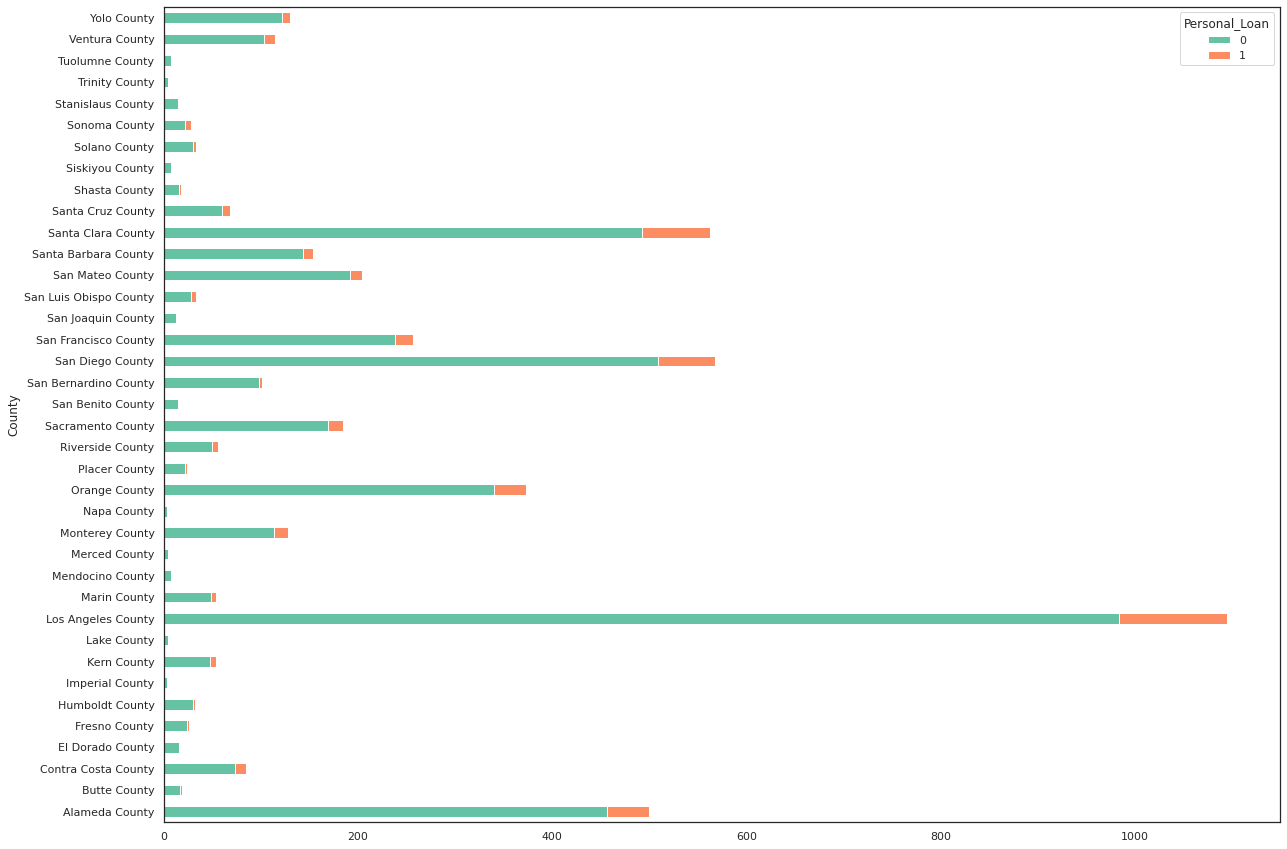

In [ ]:
pd.crosstab(index=loan['County'],columns=loan['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(20,15)) # Visualizing which counties has accepted personal loans

# (Personal Loan| Logistic Regression& Decision Tree)

* Top three Counties in order that has accepted personal loans:
  1. Los Angeles County
  2. Santa Clara County
  3. San Diego County

**Observation of Regions**

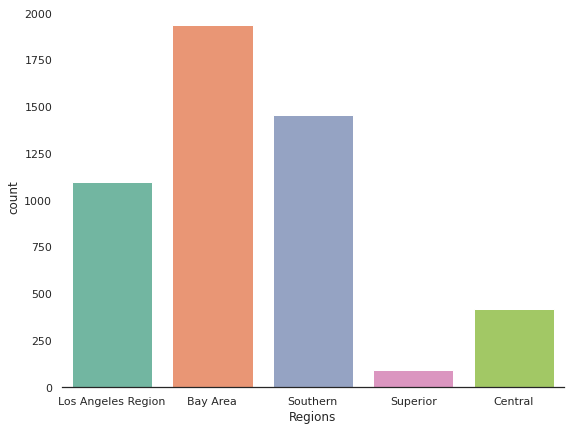

In [ ]:
plt.figure(figsize=(9,7))
sns.countplot(data=loan,x=loan['Regions'])
sns.despine(top=True,right=True,left=True) # to remove side line from graph

# (Personal Loan| Logistic Regression& Decision Tree)

* The top three Regions for Customers who will accept a Personal Loan are
  1. Bay Area
  2. Southern Regions
  3. Los Angeles Region

#**Bivariate Analysis**

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
 13  County              5000 non-null   object  
 14  Regions             5000 non-null   object  
 15  Income_Status       5000 non-null   ca

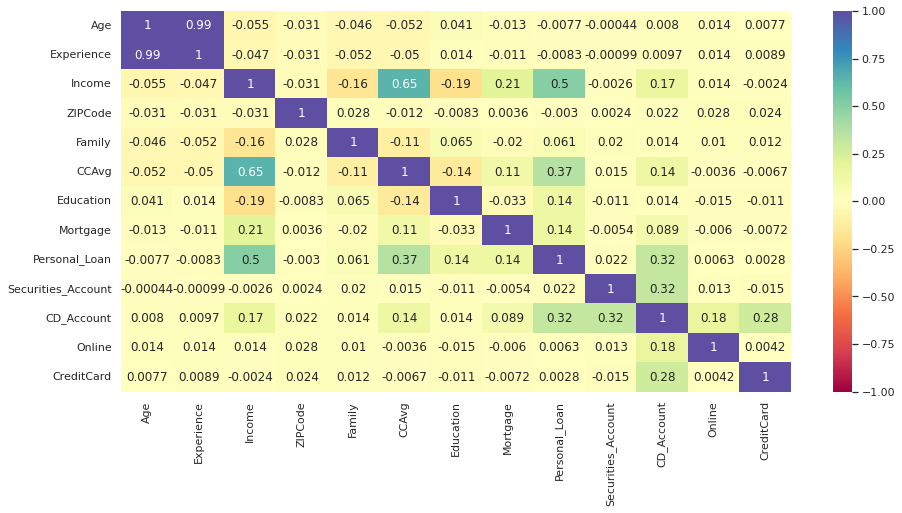

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

# (Greatlearning Login)

* Experience and Age shows the highest correlation at 0.99
* CCAvg and Income have a correlation of 0.65
* Mortgage and Income have a low-medium correlation of 0.21
* Personal_Loan and Income has a strong correlation at 0.5; which is expected because customers can afford to repay
* Personal_Loan and CCAvg have a medium correlation of 0.37
CD_Account has a medium correlation with Personal_Loan and Securities_Account of 0.32
* CreditCard and CD_Account have a low-medium correlation of 0.28


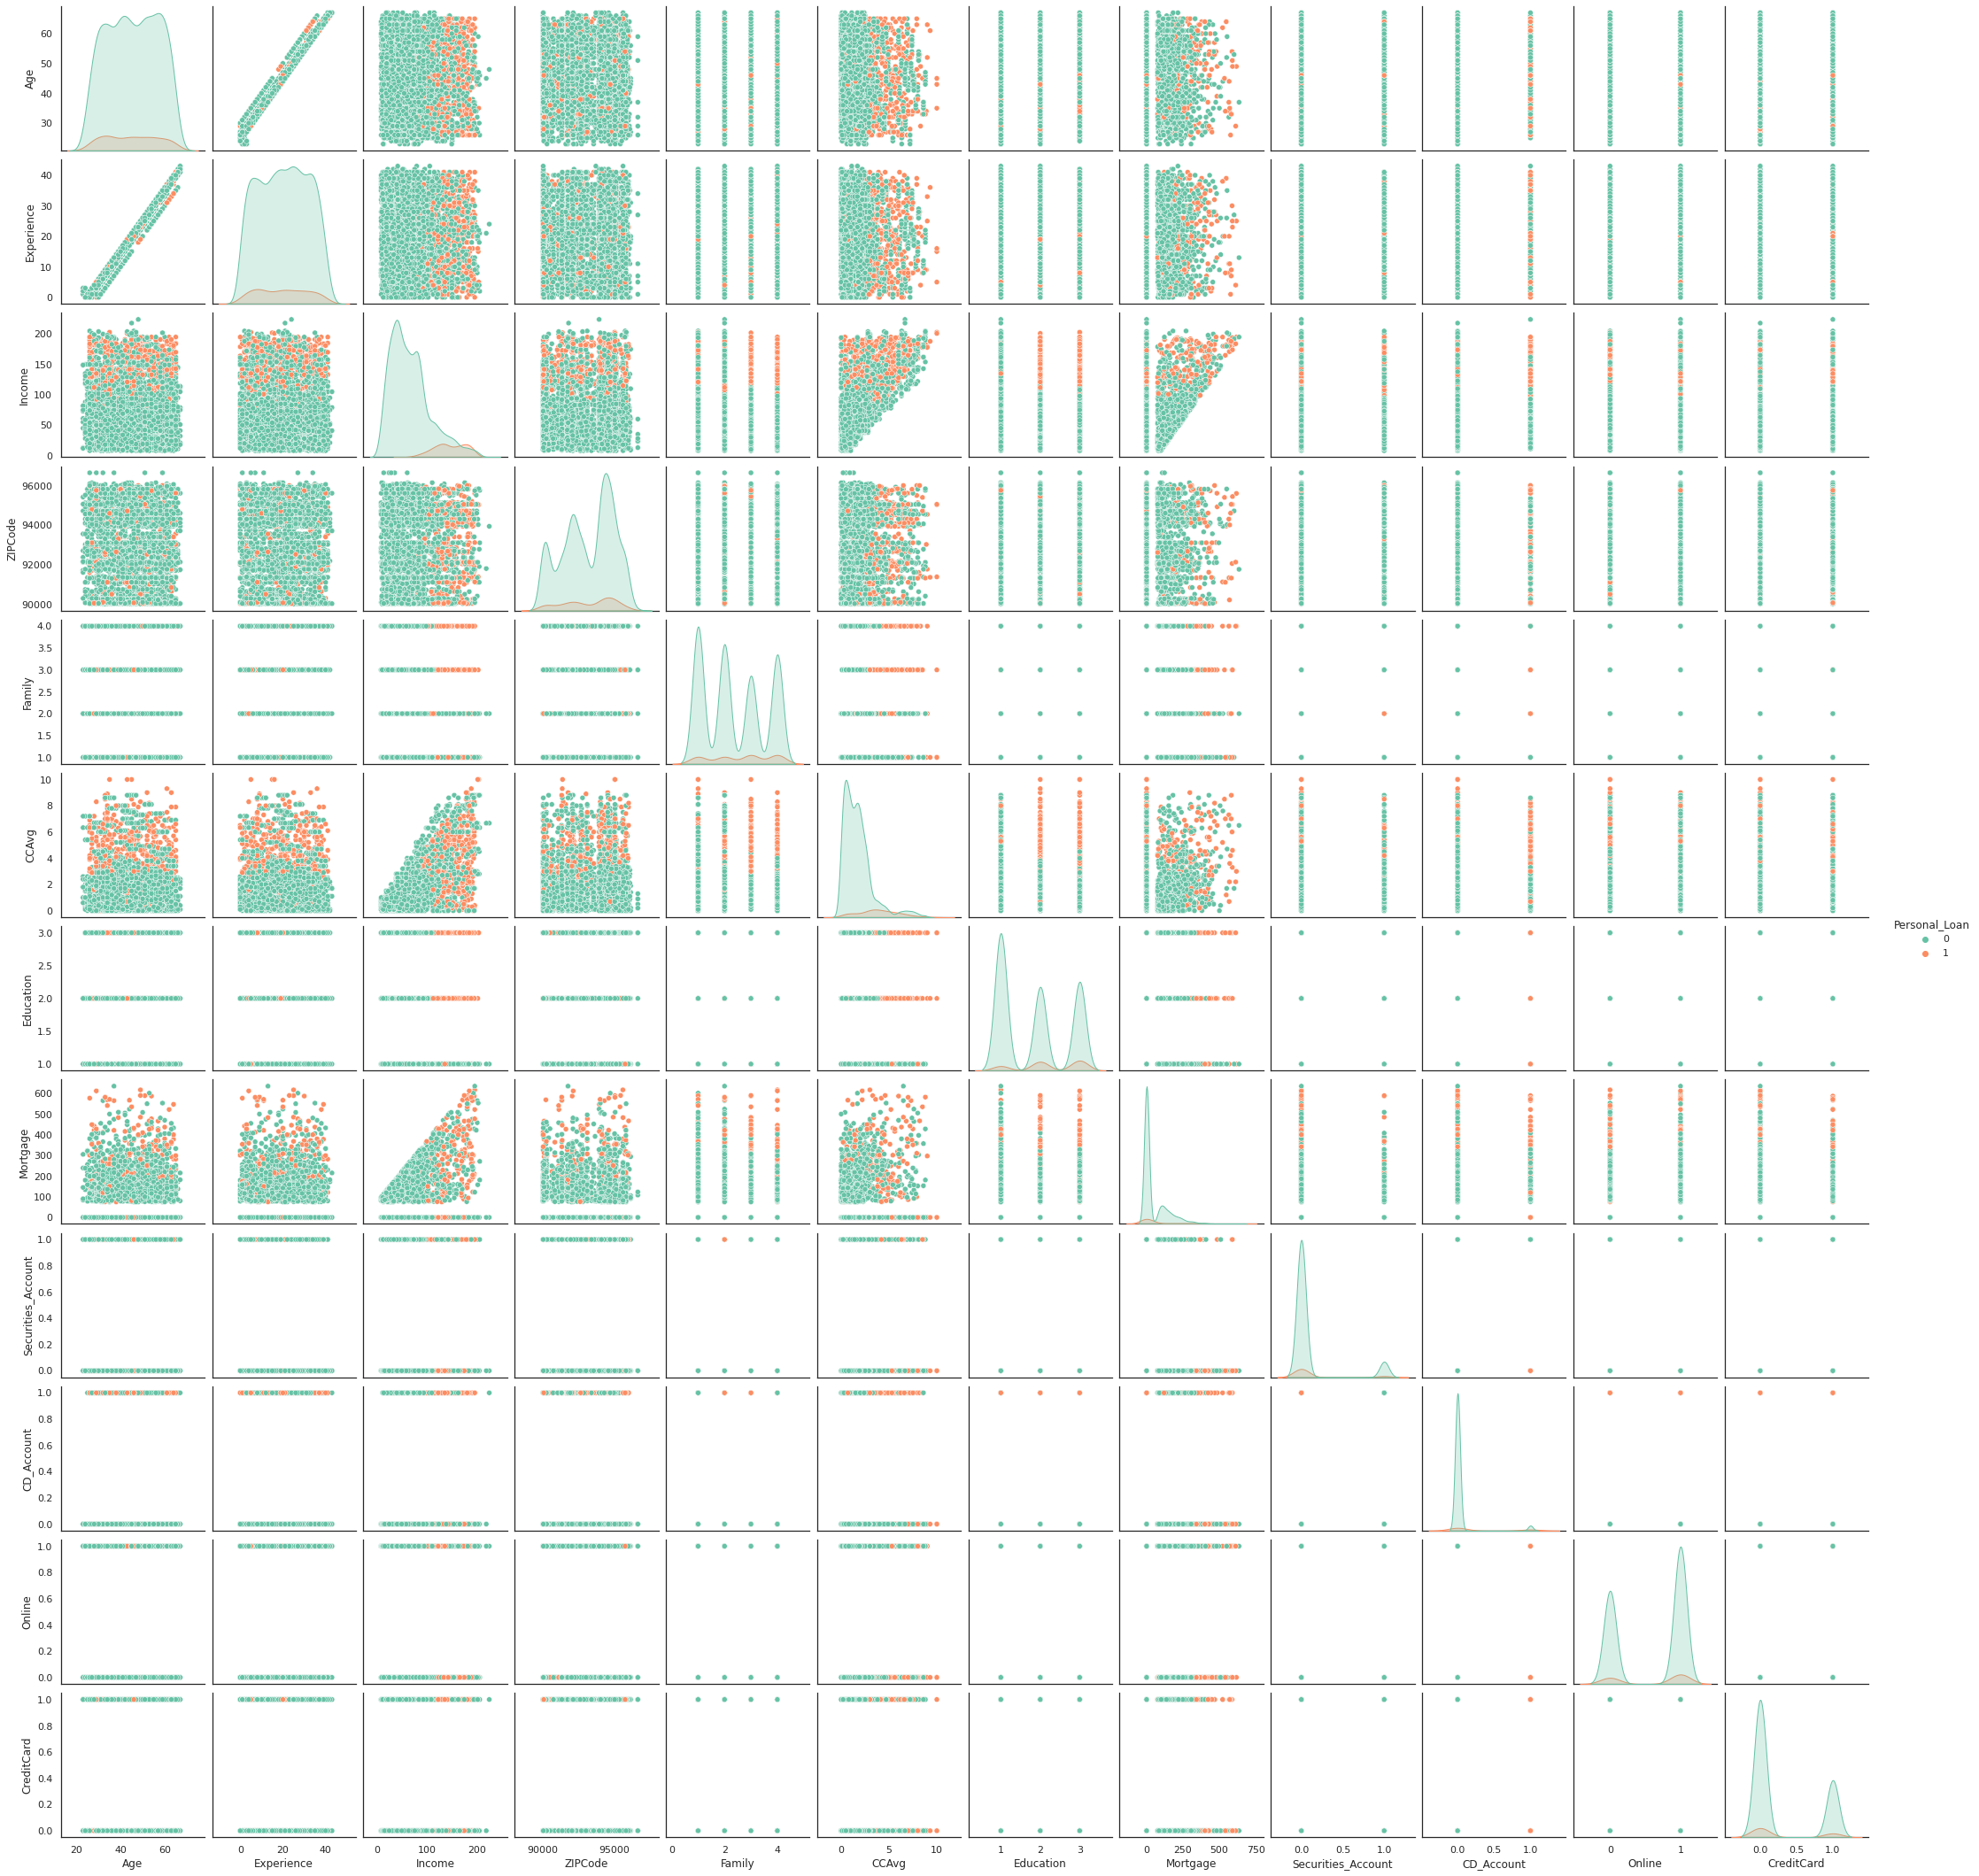

In [ ]:
sns.pairplot(data=loan,hue = "Personal_Loan")
plt.show()

# (Greatlearning Login)

**k = $1000**
* Income earning 100k or more are likely to accept a personal loan.
* CC_Avg with average spending on credit cards per month of 3000k and higher are more likely to get a personal loan
* Mortgages of 300k or more tend to get personal loan
* Customers with incomes of 100k or more tend to get higher mortgages and are more likely to get a personal loan


**Personal_Loan vs Age, Experience, Income, Family, CCAvg, and CD_Account**

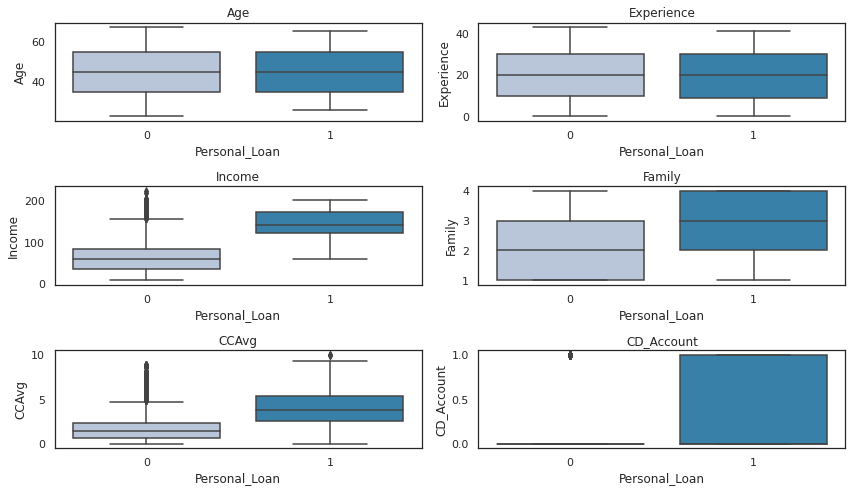

In [ ]:
cols = data[
    [
        "Age",
        "Experience",
        "Income",
        "Family",
        "CCAvg",
        "CD_Account",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(loan["Personal_Loan"], loan[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

# (Greatlearning Login)

**It is difficult to make an interpretation from the graphs above let's visualize them by removing these outliers (for visualization not from original data) to get a better understanding**

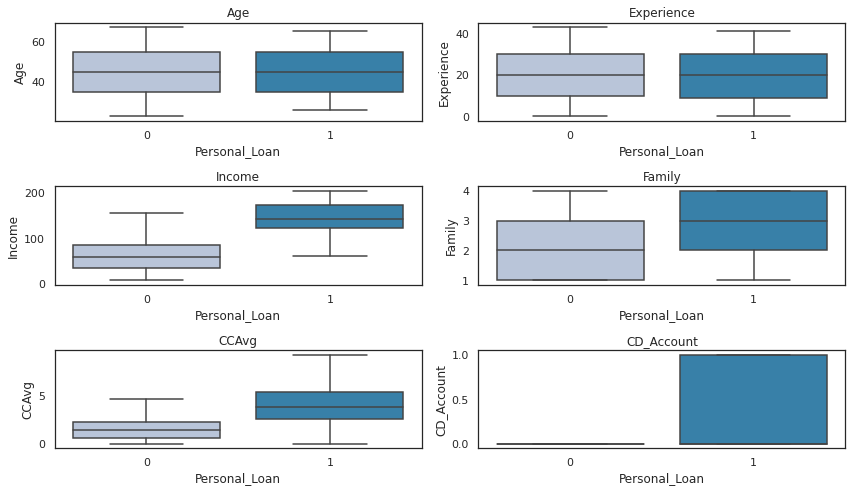

In [ ]:
cols = data[
    [
        "Age",
        "Experience",
        "Income",
        "Family",
        "CCAvg",
        "CD_Account",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(loan["Personal_Loan"], loan[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

# (Greatlearning Login)

* Customers with median incomes of 150k are more likely to accept a personal loan
* Customers with a family size of 3 tend to accept a personal loan
* Customers with average spending on credit cards of 3k are likely to accept a personal loan
* Customers with CD accounts are more likely to accept a personal loan

**Personal_Loan vs ZIPCode, Education**

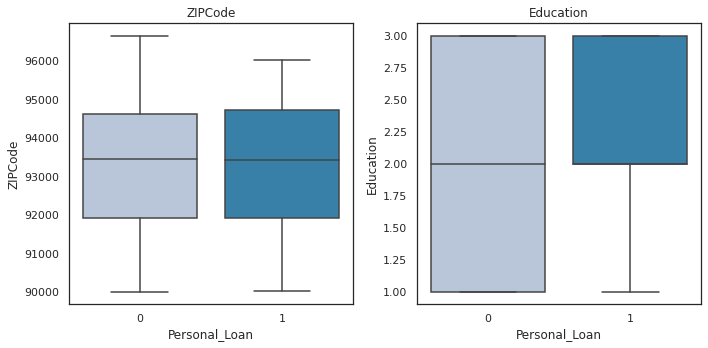

In [ ]:
cols = data[['ZIPCode','Education',]].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(loan["Personal_Loan"],loan[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

# (Greatlearning Login)

* There's not much difference with zip code customers who have credit cards by any other Bank when it comes to accepting a personal loan.
* Education wise, we see college graduates and higher more willing to accept credit cards by any other Bank when it comes to accepting a personal loan.


**Personal_Loan vs Mortgage**

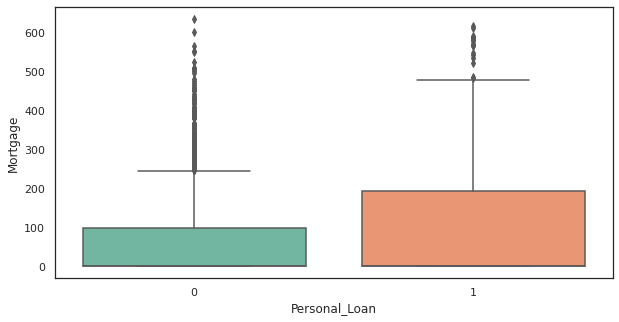

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(loan["Personal_Loan"], loan["Mortgage"])
plt.show()

# (Greatlearning Login)

* Higher Mortgage means better chance of customers accepting personal loan.

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

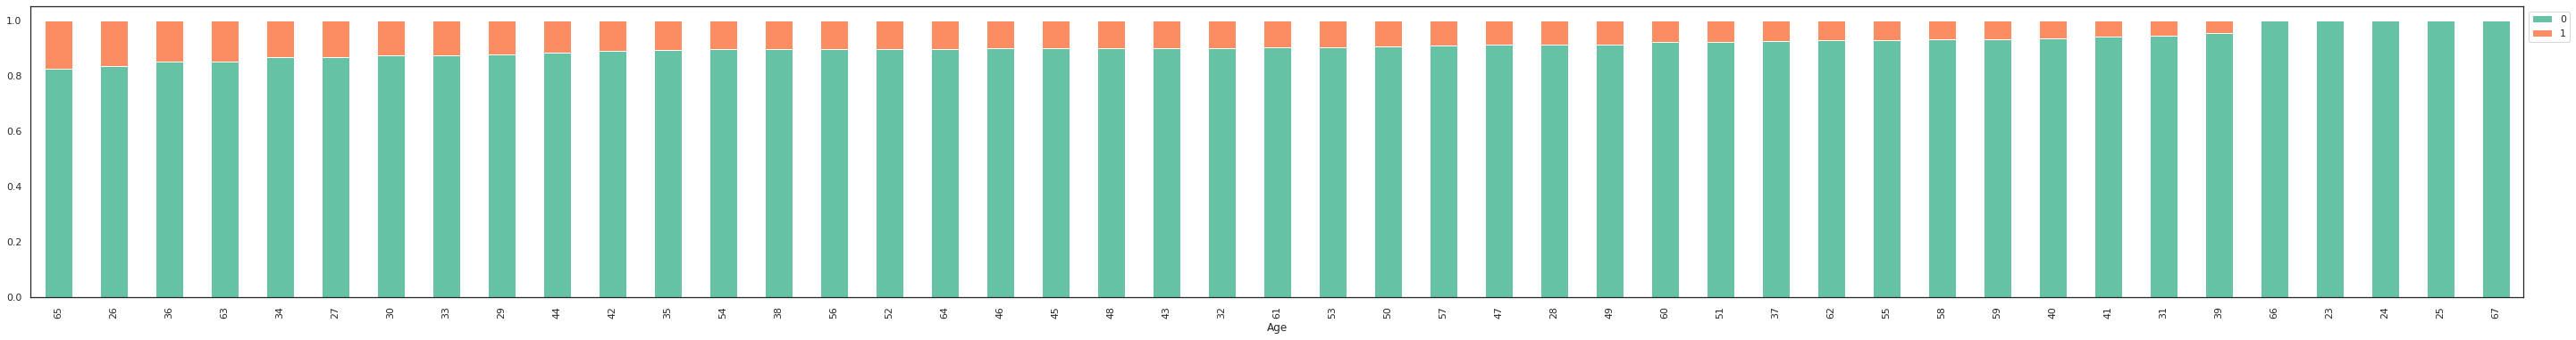

In [ ]:
stacked_barplot(loan, 'Age', 'Personal_Loan')

# (Greatlearning Login)

* Age 65 accepted the personal loan the most during the last campaign

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
3               116   17   133
20              131   17   148
12               86   16   102
5               132   14   146
32              140   14   154
26              120   14   134
25              128   14   142
19              121   14   135
16              114   13   127
37              103   13   116
35              130   13   143
30              113   13   126
23              131   13   144
22              111   13   124
11              103   13   116
31               92   12   104
36              102   12   114
6               107   12   119
18              125   12   137
7               109   12   121
29              112   12   124
28              127   11   138
17              114   11   125
13              106   11   117
21              102   11   113
39               75   10    85
34              115   10   125
27      

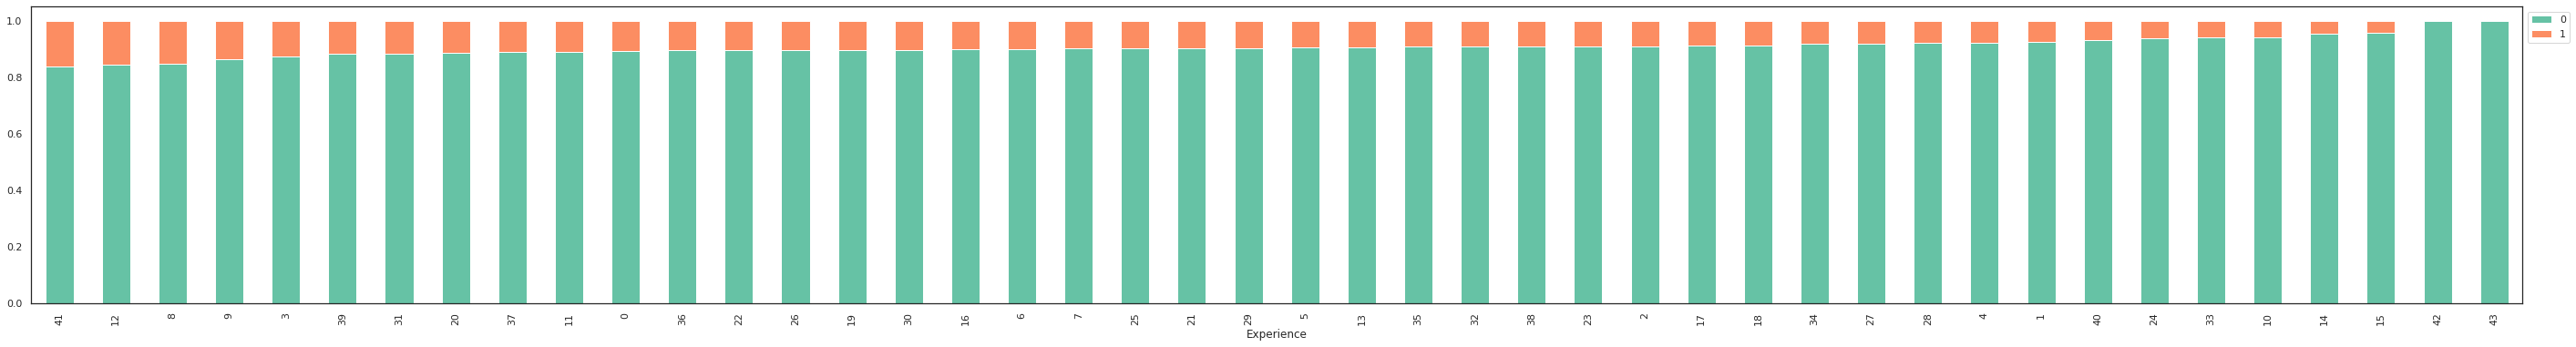

In [ ]:
stacked_barplot(loan, 'Experience', 'Personal_Loan')

# (Greatlearning Login)

* Years of professional experience does not increase the customers who accept the personal loan

Personal_Loan     0    1   All
Income                        
All            4520  480  5000
130               8   11    19
182               2   11    13
158               8   10    18
135               8   10    18
179               8    9    17
141              15    9    24
154              12    9    21
123               9    9    18
184               3    9    12
142               7    8    15
131              11    8    19
129              15    8    23
172               3    8    11
173               5    8    13
170               4    8    12
180              10    8    18
115              19    8    27
125              16    7    23
164               6    7    13
188               3    7    10
83               67    7    74
114              23    7    30
161               9    7    16
122              17    7    24
133               8    7    15
132              11    7    18
191               6    7    13
134              13    7    20
111              15    7    22
190     

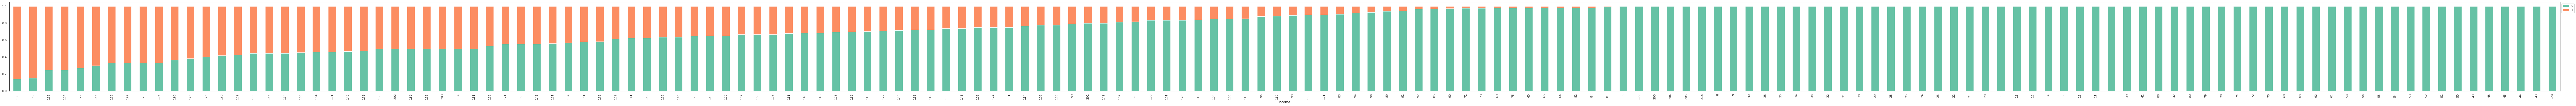

In [ ]:
stacked_barplot(loan, 'Income', 'Personal_Loan')

# (Greatlearning Login)

* Income plays a significant role in customers accepting personal loans. Higher incomes tend to accept personal loans more so than lower incomes. There are a few high incomes that do not accept personal loans. This can be expected since some higher incomes can purchase items outright without a loan.

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94720           150   19   169
94305           114   13   127
92093            42    9    51
90095            63    8    71
...             ...  ...   ...
92866             8    0     8
92843             3    0     3
92835             3    0     3
92833             4    0     4
90005             5    0     5

[468 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


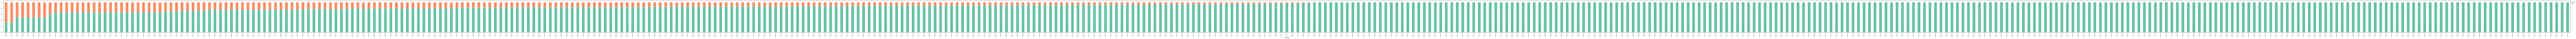

In [ ]:
stacked_barplot(loan, 'ZIPCode', 'Personal_Loan')

# (Greatlearning Login)

* Zip Codes influence whether a customer will accept a personal loan.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


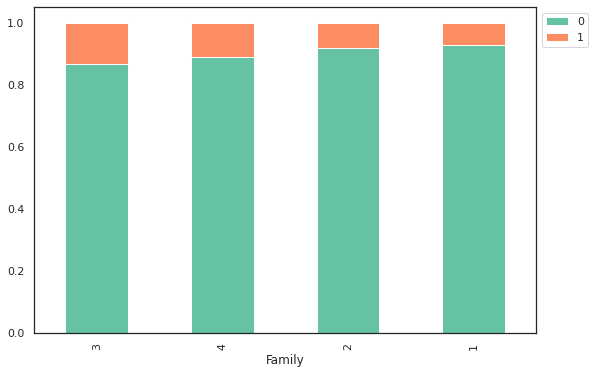

In [ ]:
stacked_barplot(loan, 'Family', 'Personal_Loan')

# (Greatlearning Login)

* There's not much difference between family size when it comes to customers accepting personal loans.

Personal_Loan     0    1   All
CCAvg                         
All            4520  480  5000
3.0              34   19    53
4.1               9   13    22
3.4              26   13    39
3.1               8   12    20
4.2               0   11    11
5.4               8   10    18
6.5               8   10    18
3.8              33   10    43
3.6              17   10    27
3.3              35   10    45
5.0               9    9    18
3.9              18    9    27
2.9              45    9    54
2.6              79    8    87
6.0              18    8    26
4.4               9    8    17
4.3              18    8    26
0.2             196    8   204
0.5             155    8   163
4.7              17    7    24
5.2               9    7    16
1.3             121    7   128
2.7              51    7    58
3.7              18    7    25
1.1              77    7    84
5.6               0    7     7
4.0              26    7    33
2.2             123    7   130
4.8               0    7     7
5.1     

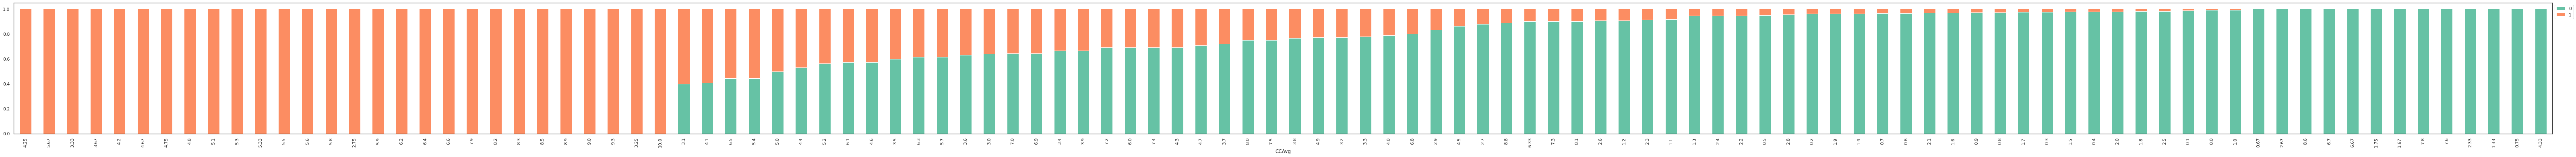

In [ ]:
stacked_barplot(loan, 'CCAvg', 'Personal_Loan')

# (Greatlearning Login)

* There is a mixture of medium and high spending on credit cards per month for customers that would accept a personal loan.


Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


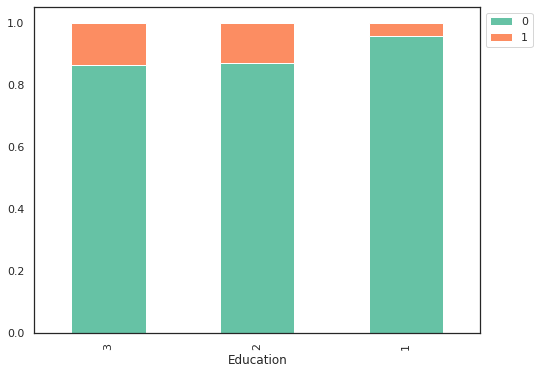

In [ ]:
stacked_barplot(loan, 'Education', 'Personal_Loan')

# (Greatlearning Login)

* There's not much difference with customer's education when it some to accepting a personal loan.

Personal_Loan     0    1   All
Mortgage                      
All            4520  480  5000
0              3150  312  3462
301               0    5     5
342               1    3     4
282               0    3     3
...             ...  ...   ...
276               2    0     2
156               5    0     5
278               1    0     1
280               2    0     2
248               3    0     3

[348 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


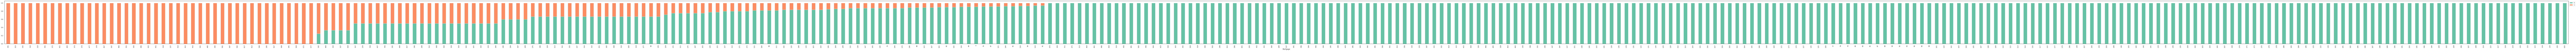

In [ ]:
stacked_barplot(loan, 'Mortgage', 'Personal_Loan')

# (Greatlearning Login)

* There are several customers with mortgages that will accept a personal loan.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


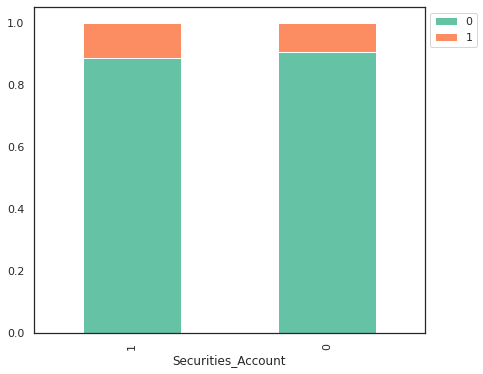

In [ ]:
stacked_barplot(loan, 'Securities_Account', 'Personal_Loan')

# (Greatlearning Login)

* There's not much difference with customers who have securities accounts when it comes to accepting a personal loan.

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


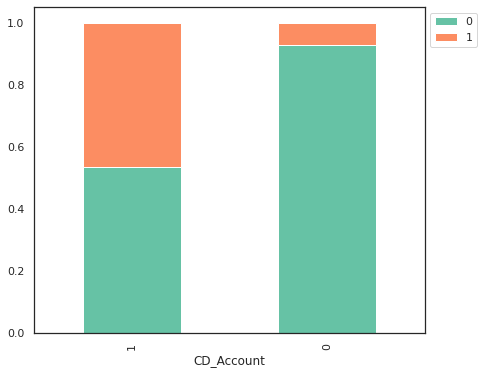

In [ ]:
stacked_barplot(loan, 'CD_Account', 'Personal_Loan')

# (Greatlearning Login)

* About half of the Customers with CD accounts accept personal loans.

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


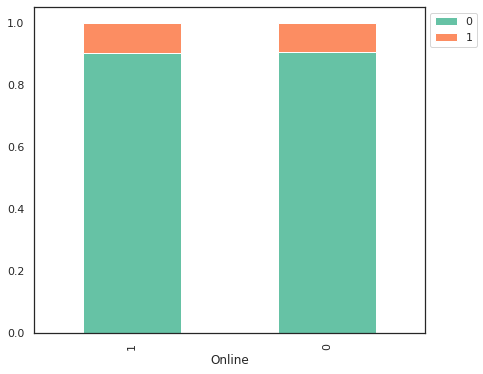

In [ ]:
stacked_barplot(loan, 'Online', 'Personal_Loan' )

# (Greatlearning Login)

* There's not much difference with customers who use internet banking facilities when it comes to accepting a personal loan.

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


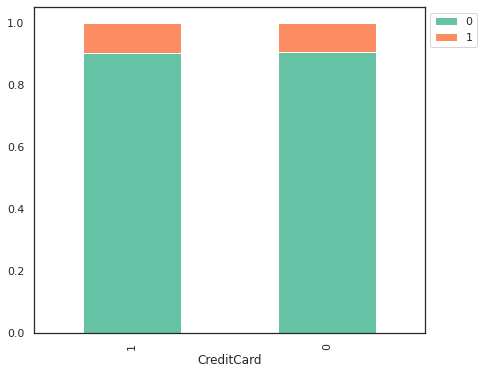

In [ ]:
stacked_barplot(loan, 'CreditCard', 'Personal_Loan')

# (Greatlearning Login)

* There's not much difference with customers who have credit cards by any other Bank when it comes to accepting a personal loan.

Personal_Loan          0    1   All
Regions                            
All                 4520  480  5000
Bay Area            1741  196  1937
Southern            1321  135  1456
Los Angeles Region   984  111  1095
Central              390   30   420
Superior              84    8    92
------------------------------------------------------------------------------------------------------------------------


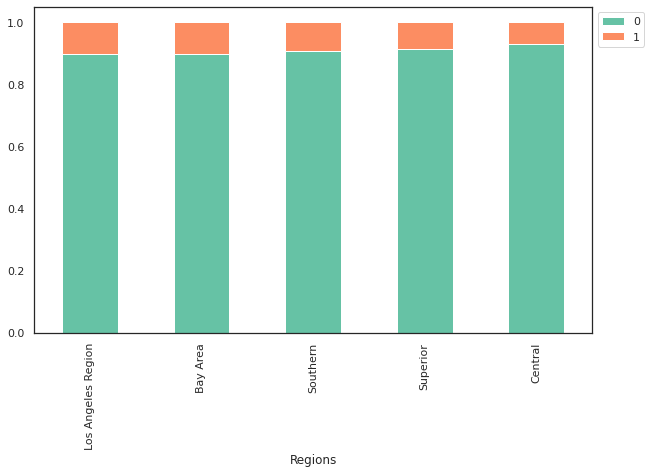

In [ ]:
stacked_barplot(loan, 'Regions', 'Personal_Loan')

# (Greatlearning Login)

* There's not much difference with customer in different regions when it comes to accepting a personal loan.

#**Key Observations -**

##**Barplot and Histogram_Boxplot Observations**

* Age has five modes with mean and median close to each other.
* Experience has five modes with mean and median close to each other.
* Income is rightly skewed with several outliers
* Middle income status has the most at 50.5%
* Single person family has the most at 29.4%, followed by two-person family with 25.9%.
* Medium is spending the most at 47.4% comparable to their income status at 50.5%.
* Family is rightly skewed with a mean ~ 2.4
* CCAvg is right skewed with several outliers
*Education is left skewed, Undergrad has the most customers at 41.9%, Advanced/Professional and Graduate are both close, with Advanced/Professional leading with 30.0%
* Mortgage is right skewed with several outliers, 69.2% of the Customers do not have a mortgage.
* 9.6% of the customers accepted the personal loan offered in the last campaign
* 10.4% of the customers have securities account with the bank.
* 6% of the customers have CD accounts with the bank.
* 59.7% of the customers use internet banking facilities.
* 29.4% of the customers use a credit card issued by another bank (excluding All life Bank)
* Top three Counties in order that has accepted personal loans:
  1. Los Angeles County
  2. Santa Clara County
  3. San Diego County
* The top three Regions for Customers who will accept a Personal Loan are
  1. Bay Area
  2. Southern Regions
  3. Los Angeles Region


##***Observation of heatmap:**

* Experience and Age shows the highest correlation at 0.99
* CCAvg and Income have a correlation of 0.65
* Income has a positive effect on several features like Mortgage (0.21),  
* Personal_Loan (0.5), and CD_Account (0.17)
* Personal_Loan and CCAvg are moderately correlated (0.37)
* CD_Account is moderately correlated to Personal_Loan and Securities_Account (0.32)
* CreditCard and CD_Account is moderately correlated (0.28)

##**Observation of pairplot: (k = $1000)**

* Income at the 100k mark more personal loans are accepted
* CC_Avg with average spending on credit cards per month of 3000k and higher are more likely to get a personal loan
* Mortgages of 300k or more tend to get personal loan
* Customers with incomes of 100k or more tend to get higher mortgages and are more likely to get a personal loan

##**Additional observations:**
* Customers with median incomes of 150k are more likely to accept a personal loan
* Customers with a family size of 3 tend to accept a personal loan
* Customers with average spending on credit cards of 3k are likely to accept a personal loan
* Customers with CD accounts are more likely to accept a personal loan

##**Observations of barplot:**
* Higher Mortgage means better chance of customers accepting personal loan.
* Age 65 accepted the personal loan the most during the last campaign
* Years of professional experience does not increase the customers who accept the personal loan
* Income plays a significant role in customers accepting personal loans. Higher incomes tend to accept personal loans more so than lower incomes. There are a few high incomes that do not accept personal loans. This can be expected since some higher incomes can purchase items outright without a loan.
* Zip Codes influence whether a customer will accept a personal loan.
* There's not much difference between family size when it comes to customers accepting personal loans.
* There is a mixture of medium and high spending on credit cards per month for customers that would accept a personal loan.
* There's not much difference with customer's education when it some to accepting a personal loan.
* There are several customers with mortgages that will accept a personal loan.
* There's not much difference with customers who have securities accounts when it comes to accepting a personal loan.
* About half of the Customers with CD accounts accept personal loans
*There's not much difference with customers who use internet banking facilities when it comes to accepting a personal loan.
* There's not much difference with customers who have credit cards by any other Bank when it comes to accepting a personal loan.




#**Split Data**

In [ ]:
X = loan.drop(['Personal_Loan'], axis=1)
y = loan['Personal_Loan']

# (Greatlearning Login)

In [ ]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

# (Greatlearning Login)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  County_Butte County  \
0                   1           0       0           0                    0   
1                   1           0       0           0                    0   
2                   0           0       0           0                    0   
3                   0           0       0           0                    0   
4                   0           0       0           1                    0   

   County_Contra Costa County  County_El Dorado County  County_Fresno County  \
0                           0                        0                     0   
1                           0                        0                     0   
2                           0                        0                     0   
3                           0                        0                     0   
4                           0                        0                     0   

   County_Humboldt County  County_Imperial County  County_Kern County  \
0                       0                       0                   0   
1                       0                       0                   0   
2                       0                       0                   0   
3                       0                       0                   0   
4                       0                       0                   0   

   County_Lake County  County_Los Angeles County  County_Marin County  \
0                   0                          1                    0   
1                   0                          1                    0   
2                   0                          0                    0   
3                   0                          0                    0   
4                   0                          1                    0   

   County_Mendocino County  County_Merced County  County_Monterey County  \
0                        0                     0                       0   
1                        0                     0                       0   
2                        0                     0                       0   
3                        0                     0                       0   
4                        0                     0                       0   

   County_Napa County  County_Orange County  County_Placer County  \
0                   0                     0                     0   
1                   0                     0                     0   
2                   0                     0                     0   
3                   0                     0                     0   
4                   0                     0                     0   

   County_Riverside County  County_Sacramento County  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   County_San Benito County  County_San Bernardino County  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   County_San Diego County  County_San Francisco County  \
0                        0                            0   
1                        0    

In [ ]:
X.shape

(5000, 53)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# (Greatlearning Login)

In [ ]:
print('Number of rows in train data = ', X_train.shape[0])
print('Number of rows in test data = ', X_test.shape[0])

# (Greatlearning Login)

Number of rows in train data =  3000
Number of rows in test data =  2000


In [ ]:
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

# (Greatlearning Login)

Percentage of classes in training set:
0    0.904333
1    0.095667
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.9035
1    0.0965
Name: Personal_Loan, dtype: float64


#**Build Decision Tree Model**

**Model evaluation criterion**

**Model can make wrong predictions as:**
1. Predicting a liability customer will become an asset customer and buy a personal loan but in reality the liability customer does not buy a personal loan and remains a liability customer. - Loss of resources **(False Positive)**

2. Predicting a liability customer will not become an asset customer and not buy a personal loan but in reality the liability customer does buy a personal loan and becomes an asset customer. - Loss of opportunity **(False Negative)**


**Which case is more important?**
* If we predict a customer who was going to purchase a personal loan as a customer who will not going to purchase a personal loan.

**How to reduce this loss i.e need to reduce False Negatives?**
* recall should be maximized, the greater the recall higher the chances of minimizing the false negatives.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
  """
  Function to compute different metrics to check classification model performance

  model: classifier
  predictors: independent variables
  target: dependent variable
  """

  # predicting using the independent variables
  pred = model.predict(predictors)

  acc = accuracy_score(target, pred) # to compute Accuacy
  recall = recall_score(target, pred) # to compute Recall
  precision = precision_score(target, pred) # to compute Precision
  f1 = f1_score(target, pred) # to compute F1-score

  # creating a dataframe of metrics
  df_perf = pd.DataFrame({'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1}, index=[0],)

  return df_perf

  # (Greatlearning Login)

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
  """
  To plot the confusion_matrix with percentages

  model: classifier
  predictors: independent variables
  target: dependent variable
  """

  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  labels = np.asarray([['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())] for item in cm.flatten()]).reshape(2,2)

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=labels, fmt='')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  # (Greatlearning Login)

#**Build Decision Tree Model**

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=1)
model.fit(X_train, y_train)

# (Greatlearning Login)

DecisionTreeClassifier(random_state=1)

**Checking model performance on training set**

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

# (Greatlearning Login)

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

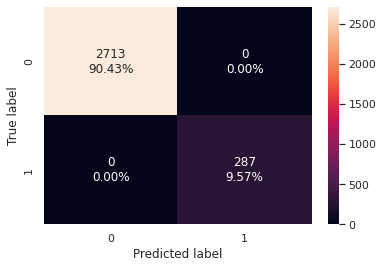

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

# (Greatlearning Login)

**Checking model performance on test set**

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

# (Greatlearning Login)

Accuracy    Recall  Precision        F1
0     0.976  0.880829   0.871795  0.876289

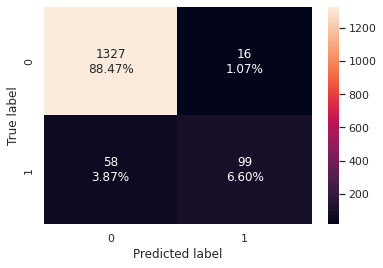

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

* Model is giving good and generalized results on training and test set

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

# (Greatlearning Login)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_Solano County', 'County_Sonoma County', 'Count

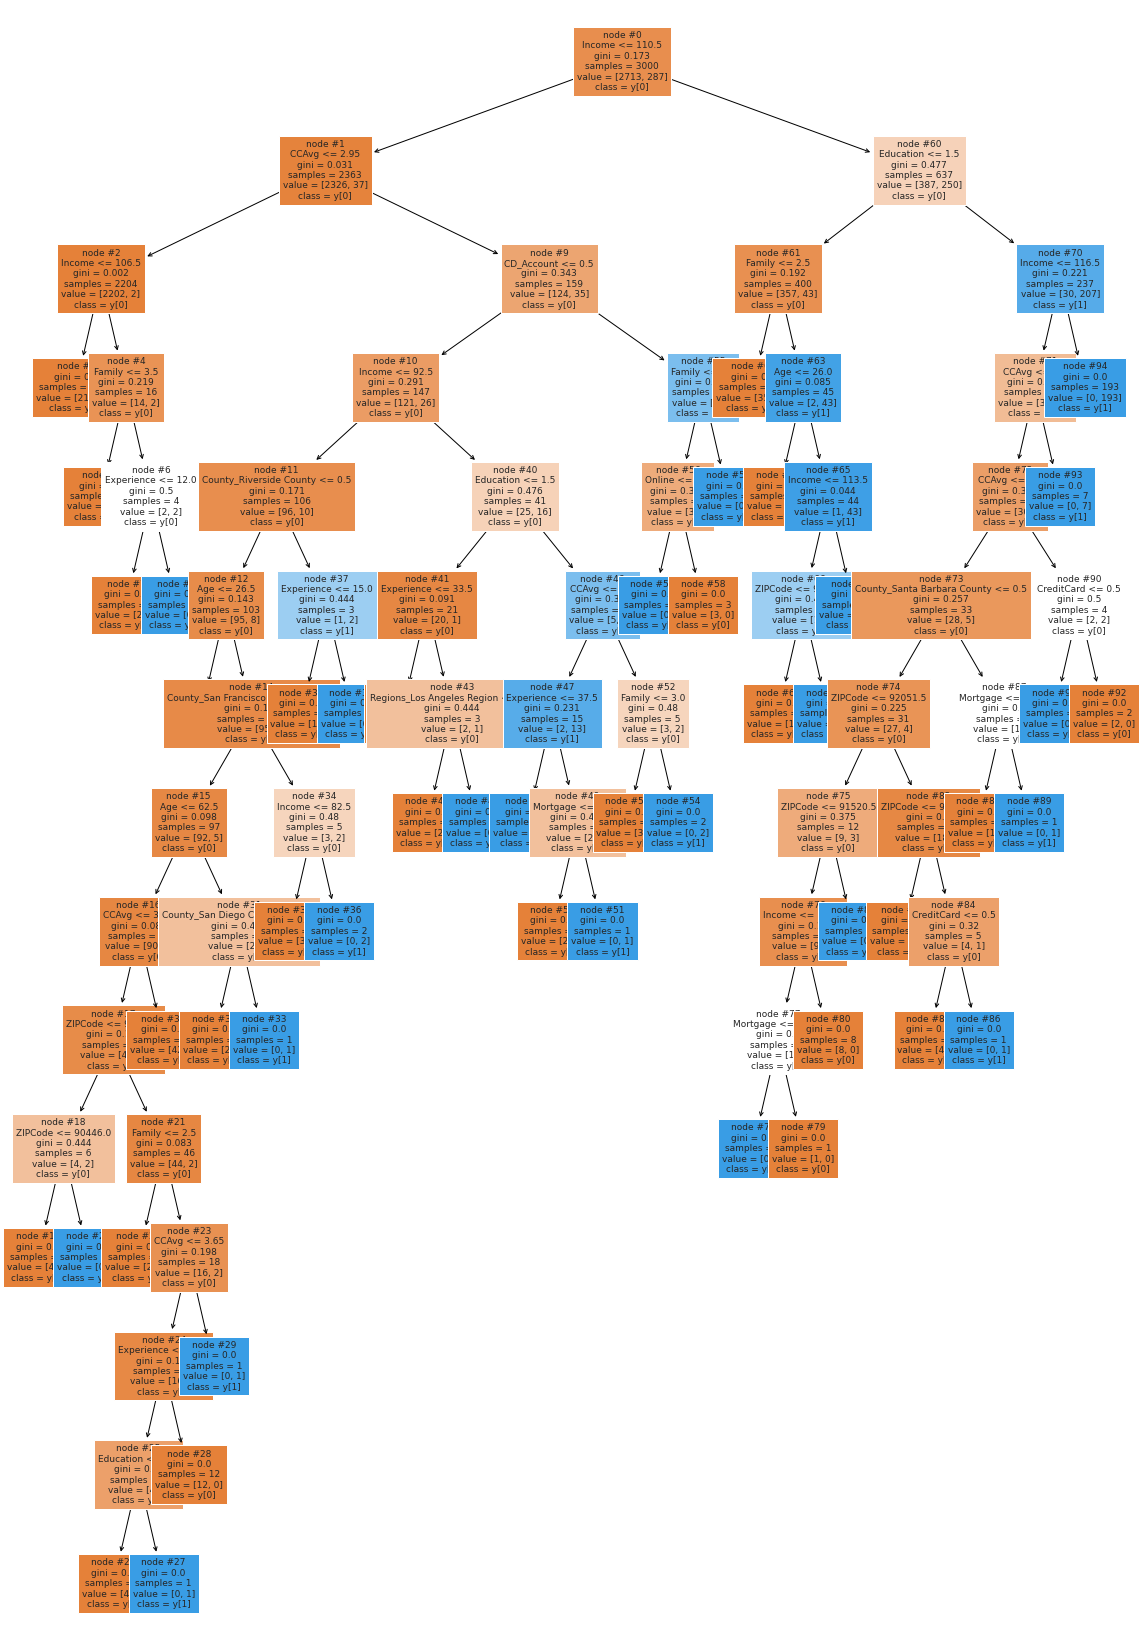

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True,)
for o in out:
  arrow=o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

# (Greatlearning Login)

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

# (Greatlearning Login)

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2188.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 38.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- Age >  38.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- County_Riverside County <= 0.50
|   |   |   |   |   |--- Experience <= 0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Experience >  0.50
|   |   |   |   |   |   |--- County_San Francisco County <= 0.50
|   |   |   |   |   |   |   |--- Experience <= 37.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.75
|   |   |   |   |   |   |   |   |   |--- ZIPCode <= 91257.00
|   |   |   |   |   |   |   

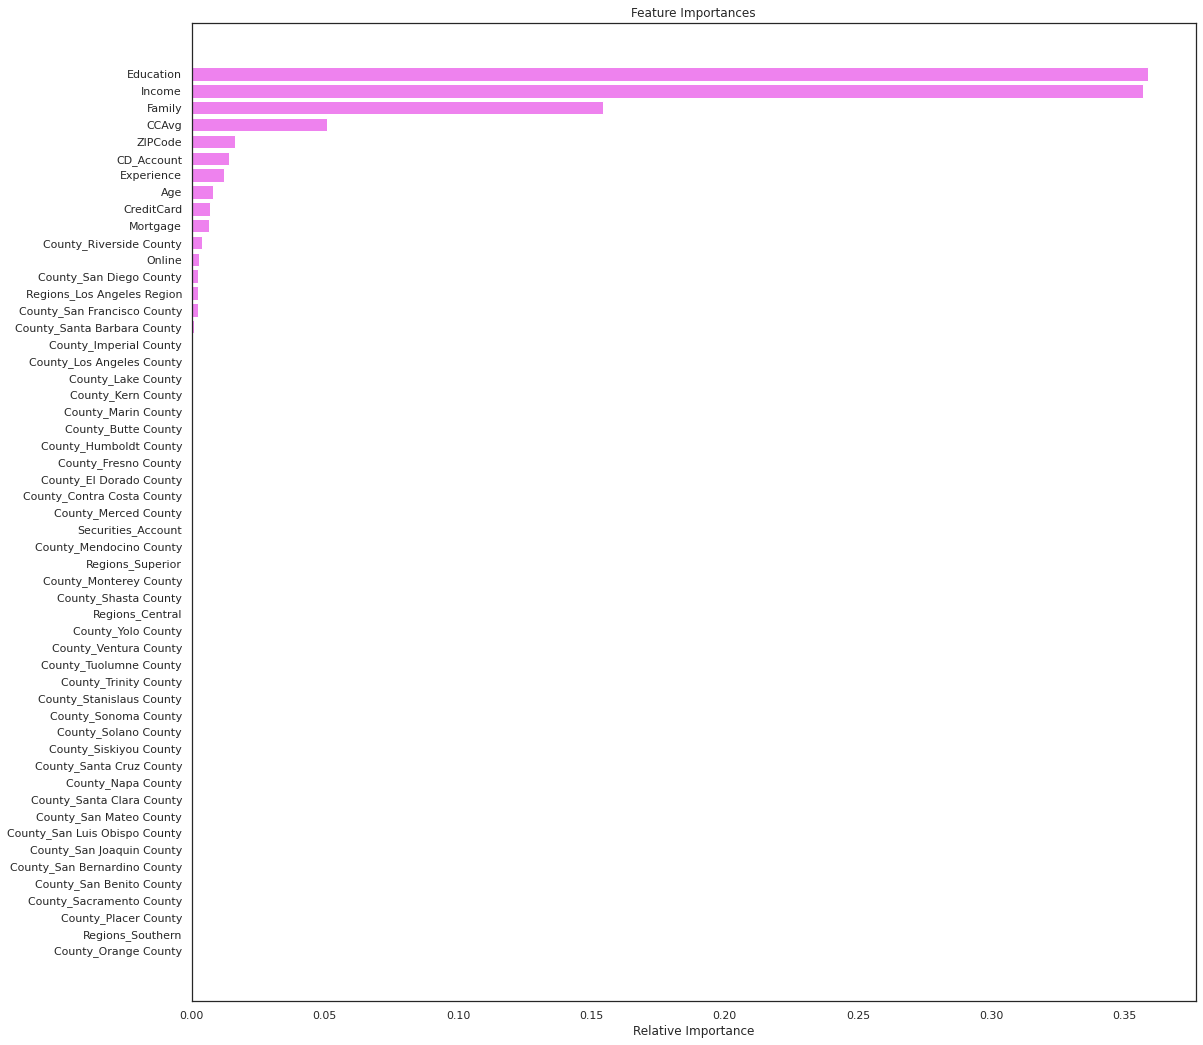

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18, 18))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# (Greatlearning Login)

* Income, Education, and Family are the top 3 important features.
* It is interesting to see Riverside County as holding importances.

#**Using GridSearch for Hyperparameter tuning of our tree model**

* Let's see if we can improve our model performance even more.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

# (Greatlearning Login)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

**Checking performance on training set**

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

# (Greatlearning Login)

Accuracy    Recall  Precision        F1
0  0.998333  0.982578        1.0  0.991213

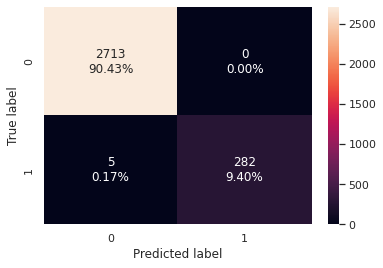

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

# (Greatlearning Login)

* The Recall has improved on the training set as compared to the initial model.

**Checking model performance on test set**

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)

decision_tree_tune_perf_test

# (Greatlearning Login)

Accuracy    Recall  Precision        F1
0    0.9795  0.880829   0.904255  0.892388

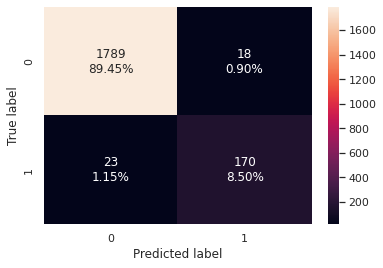

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

# (Greatlearning Login)

* After hyperparameter tuning the model has performance has remained same and the model has become simpler.

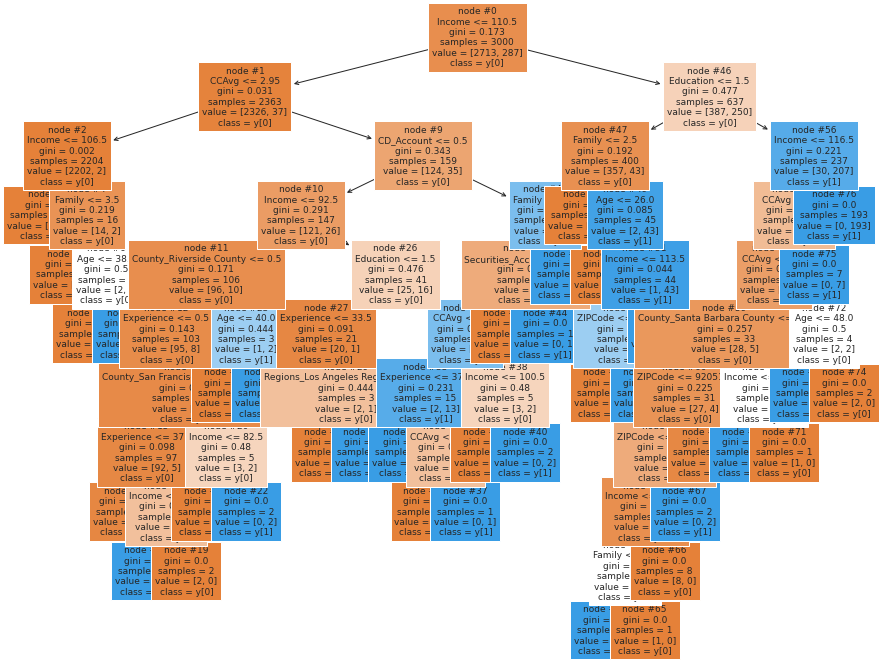

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(estimator, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True,)
plt.show()

# (Greatlearning Login)

* We are getting a simplified tree after pre-pruning, but the tree is still complex

#**Cost Complexity Pruning**

In [ ]:
clf =DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# (Greatlearning Login)

In [ ]:
pd.DataFrame(path)

# (Greatlearning Login)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000300    0.000600
2     0.000314    0.001227
3     0.000316    0.001859
4     0.000317    0.002494
5     0.000324    0.003142
6     0.000326    0.003793
7     0.000333    0.004127
8     0.000377    0.006013
9     0.000421    0.007276
10    0.000444    0.008608
11    0.000444    0.009053
12    0.000444    0.009497
13    0.000478    0.010453
14    0.000500    0.010953
15    0.000586    0.012710
16    0.000623    0.013333
17    0.000674    0.014007
18    0.000685    0.016063
19    0.001000    0.017063
20    0.002508    0.024587
21    0.002580    0.027167
22    0.004751    0.031918
23    0.011105    0.043023
24    0.024311    0.067334
25    0.052848    0.173029

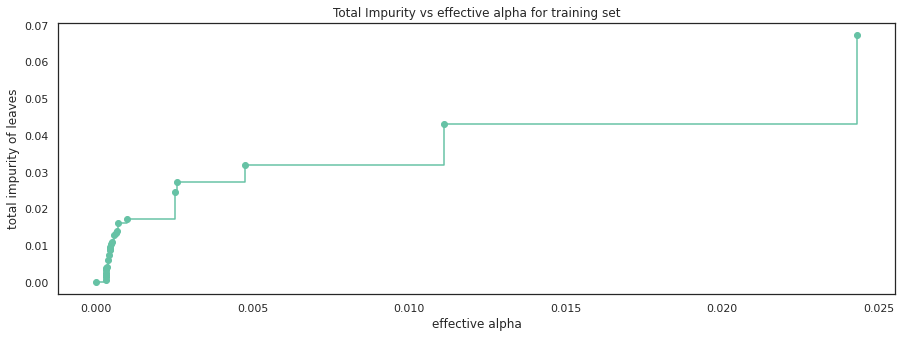

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for training set')
plt.show()

# (Greatlearning Login)

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

# (Greatlearning Login)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05284766110239135


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

<bound method Figure.tight_layout of <Figure size 720x504 with 2 Axes>>

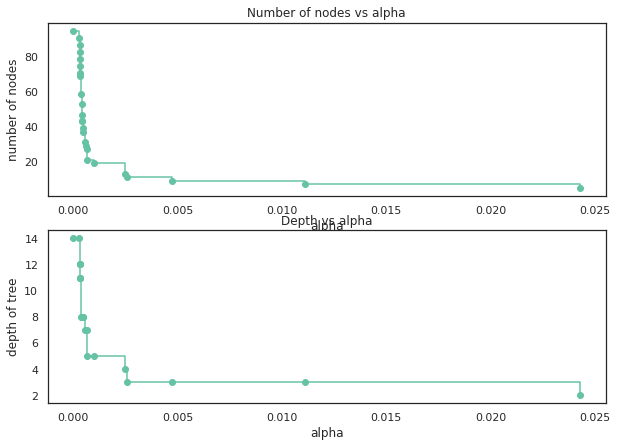

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs alpha')
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title('Depth vs alpha')
fig.tight_layout

# (Greatlearning Login)

#**Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
  pred_train = clf.predict(X_train)
  values_train = recall_score(y_train, pred_train)
  recall_train.append(values_train)

  # (Greatlearning Login)

In [ ]:
recall_test = []
for clf in clfs:
  pred_test = clf.predict(X_test)
  values_test = recall_score(y_test, pred_test)
  recall_test.append(values_test)

  # (Greatlearning Login)

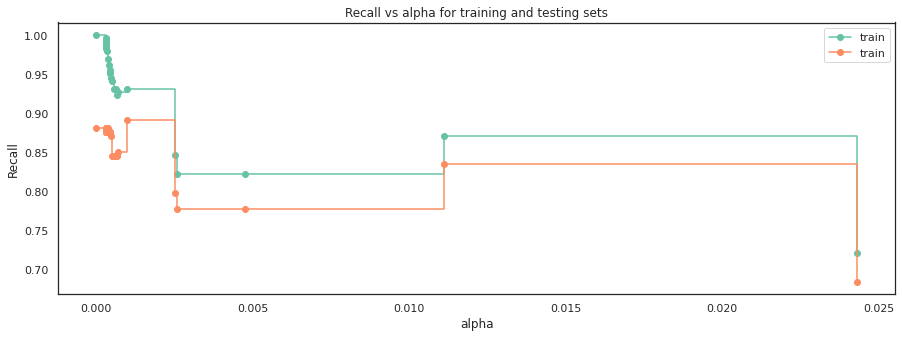

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('alpha')
ax.set_ylabel('Recall')
ax.set_title('Recall vs alpha for training and testing sets')
ax.plot(ccp_alphas, recall_train, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, recall_test, marker='o', label='train', drawstyle='steps-post')
ax.legend()
plt.show()

# (Greatlearning Login)

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

# (Greatlearning Login)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=1)


**Checking model performance on training set**

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_postpruned_perf_train

# (Greatlearning Login)

Accuracy    Recall  Precision        F1
0      0.99  0.930314   0.963899  0.946809

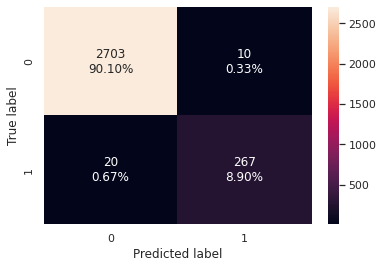

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

# (Greatlearning Login)

**Checking model performance on test set**

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

# (Greatlearning Login)

Accuracy    Recall  Precision        F1
0    0.9825  0.891192   0.924731  0.907652

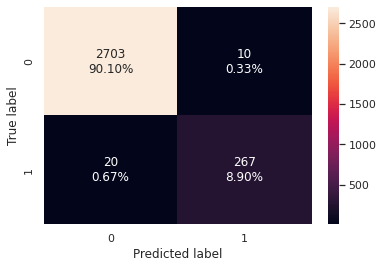

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

# (Greatlearning Login)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.


#**Visualizing the Decision Tree**



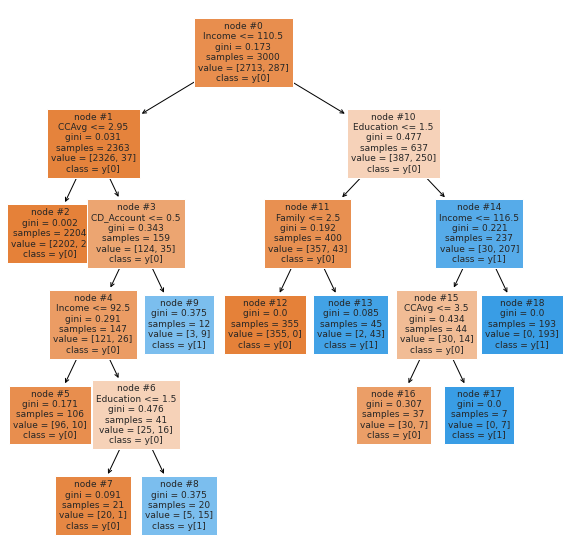

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# (Greatlearning Login)

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

# (Greatlearning Login)

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2202.00, 2.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [96.00, 10.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [20.00, 1.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [5.00, 15.00] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 9.00] class: 1
|--- Income >  110.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [355.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.00, 43.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 3.50
|   |   |   |   |--- weights: [30.00, 7.00] class: 0
|   |   |   |--- CCAvg >  3.50
|   |   |   |   |--- weights: [0.00, 7.00] class: 1
|   |   |--- Income >  116.50
|  

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# (Greatlearning Login)

                                    Imp
Education                      0.394775
Income                         0.386771
Family                         0.155873
CCAvg                          0.047004
CD_Account                     0.015577
County_Santa Barbara County    0.000000
County_Solano County           0.000000
County_Siskiyou County         0.000000
County_Shasta County           0.000000
County_Santa Cruz County       0.000000
County_Santa Clara County      0.000000
Age                            0.000000
County_San Mateo County        0.000000
County_Stanislaus County       0.000000
County_San Luis Obispo County  0.000000
County_San Joaquin County      0.000000
County_San Francisco County    0.000000
County_Sonoma County           0.000000
County_Ventura County          0.000000
County_Trinity County          0.000000
County_Tuolumne County         0.000000
County_San Bernardino County   0.000000
County_Yolo County             0.000000
Regions_Central                0.000000


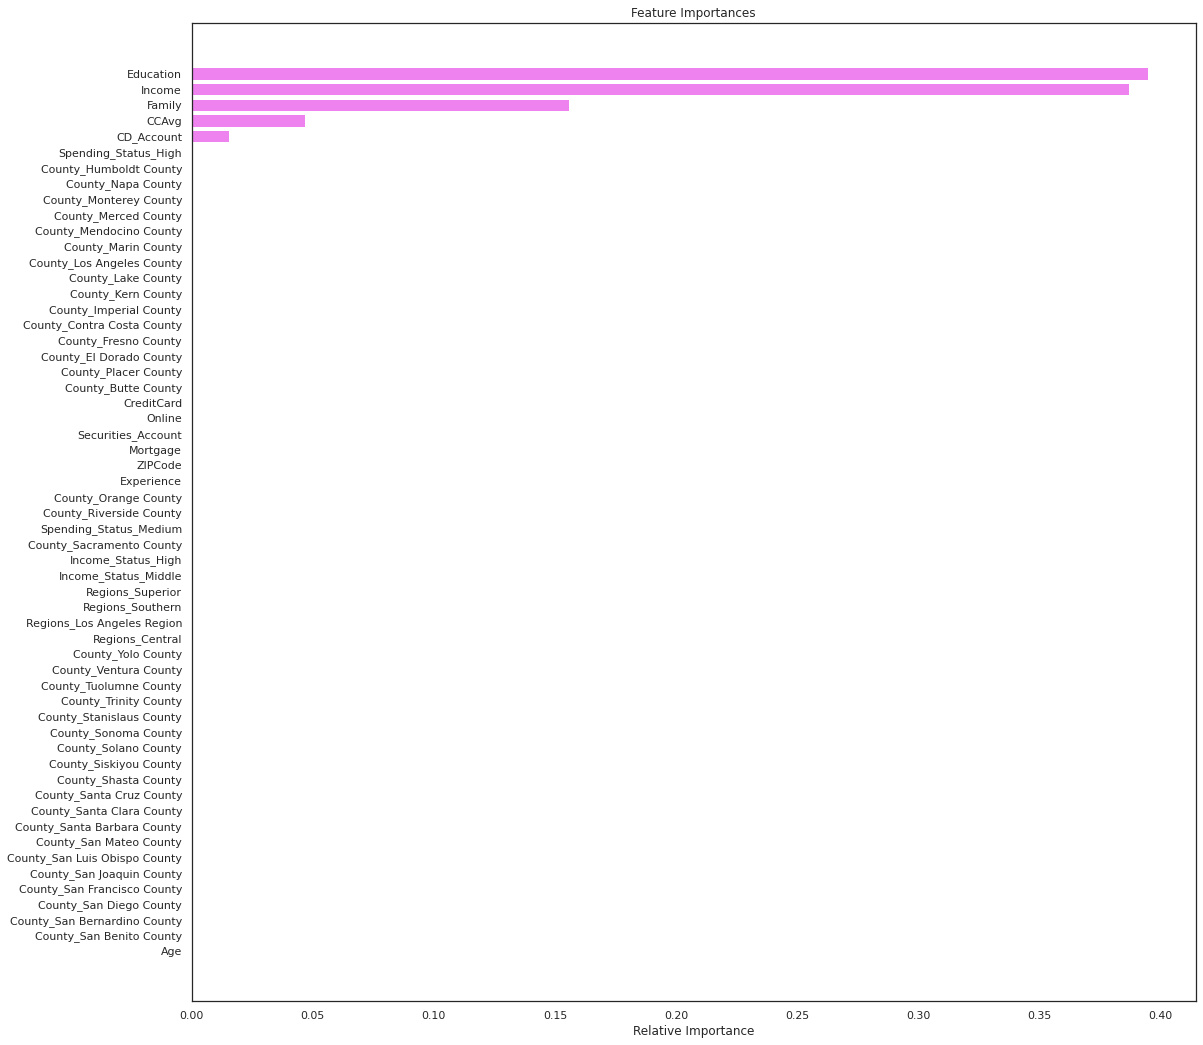

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18, 18))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# (Greatlearning Login)

* Education is the most important feature after post-pruning, followed by Income and Family

#**Comparing all the decision tree models**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat([decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_postpruned_perf_train.T], axis=1,
                                 )
models_train_comp_df.columns = ['Decision Tree sklearn', 'Decision Tree (Pre-Pruning)', 'Decision Tree (Post-Pruning)',]
print('Training performance comparison:')
models_train_comp_df

# (Greatlearning Login)

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.998333   
Recall                       1.0                     0.982578   
Precision                    1.0                     1.000000   
F1                           1.0                     0.991213   

           Decision Tree (Post-Pruning)  
Accuracy                       0.990000  
Recall                         0.930314  
Precision                      0.963899  
F1                             0.946809

In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

# (Greatlearning Login)

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.976000                     0.979500   
Recall                  0.880829                     0.880829   
Precision               0.871795                     0.904255   
F1                      0.876289                     0.892388   

           Decision Tree (Post-Pruning)  
Accuracy                       0.982500  
Recall                         0.891192  
Precision                      0.924731  
F1                             0.907652

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

#**Business Insights**

* Education, Income, and Family (in that order) are the most important variables in determining if a customer will accept a personal loan.
* Customers with Education levels less than 1.5 years should be our target
* Income less than 110.5k are favorable customers who will accept personal loans
* Family size of 2.5 are also favorable customers.
* Criteria to campiagn for personal loans according to decision tree model should depend on three main factors - Education, income, and family that is - If the Eduation is greater than 1.5 years, the income is greater than 110.5k, and family size is greater than 2.5 then the customer will not accept a personal loan. If the customer education is less than 1.5 years, income is less than 110.5k, and family size is less than 2.5 chances that they will accept a personal loan.

#**Logistic Regression Model**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

    # (Greatlearning Login)

In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

    # (Greatlearning Login)

##**Data Preparation**

In [ ]:
X = data.drop("Personal_Loan", axis=1)
Y = data["Personal_Loan"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

# (Greatlearning Login)

In [ ]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

# (Greatlearning Login)

##**Finding the coefficients**

In [ ]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

# (Greatlearning Login)

ID       Age  Experience    Income   ZIPCode    Family    CCAvg  \
coef -0.000073 -0.073618    0.085261  0.051235 -0.000116  0.682302  0.11617   

      Education  Mortgage  Securities_Account  CD_Account    Online  \
coef   1.581582  0.000671           -0.582645    2.978088 -0.421816   

      CreditCard  
coef   -0.898321

##**Coefficient interpretations**

* Coefficients of Experience, Income, Family, CCAvg, Education, Mortgage, and CD_Account are positive, an increase in these will lead to an increase in chances of a customer to accept a personal loan.
* Coefficients of ID, Age, ZIPCode, Securities_Account, Online, and CreditCard are negative, an increase in these will lead to a decrease chance of a customer accepting a personal loan.

##**Converting coefficients to odds**

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, odds = exp(b)
* The percentage change in odds is given as odds = (exp(b) - 1) * 100

**Odds from coefficients**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

# (Greatlearning Login)

ID       Age  Experience    Income   ZIPCode     Family  \
Odds         0.999927  0.929026    1.089001  1.052571  0.999884   1.978426   
Change_odd% -0.007274 -7.097368    8.900146  5.257055 -0.011603  97.842620   

                 CCAvg   Education  Mortgage  Securities_Account   CD_Account  \
Odds          1.123187    4.862640  1.000671            0.558420    19.650209   
Change_odd%  12.318720  386.264035  0.067108          -44.158033  1865.020932   

                Online  CreditCard  
Odds          0.655854    0.407253  
Change_odd% -34.414561  -59.274714

##**Coefficient interpretations**

* ID: Holding all other features constant a unit change in ID will decrease the odds of a customer accepting a personal loan by 0.99 times or a 0.007% decrease in the odds.
* Age: Holding all other features constant a unit change in Age will decrease the odds of a customer accepting a personal loan by 0.93 times or a 7.09% decrease in the odds.
* Experience: Holding all other features constant a unit change in Experience will increase the odds of a customer accepting a personal loan by 1.09 times or a 8.9% increase in the odds.
* Income: Holding all other features constant a unit change in Income will increase the odds of a customer accepting a personal loan by 1.05 times or a 5.25% increase in the odds.
* ZIPCode: Holding all other features constant a unit change in ZIPCode will increase the odds of a customer accepting a personal loan by 0.99 times or a 0.01% increase in the odds.

Interpretation for other attributes can be made similarly.

**Checking model performance on training set**

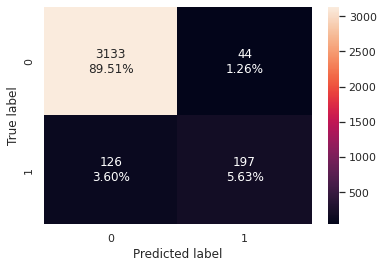

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

# (Greatlearning Login)

In [ ]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

# (Greatlearning Login)

Training performance:


Accuracy    Recall  Precision        F1
0  0.951429  0.609907   0.817427  0.698582

#**ROC-AUC**

* ROC-AUC on training set

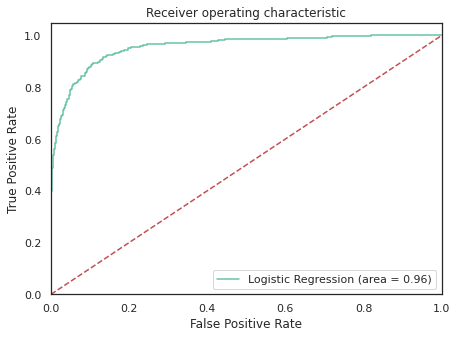

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# (Greatlearning Login)

* Logistic Regression model is giving a good performance on training set, the recall is moderate.

#**Model Performance Improvement**

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#**Optimal threshold using AUC-ROC curve**

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

# (Greatlearning Login)

0.09772951751055055


**Checking model performance on training set**

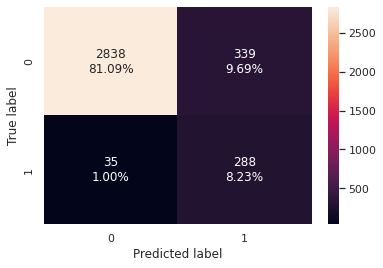

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

# (Greatlearning Login)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

# (Greatlearning Login)

Training performance:


Accuracy    Recall  Precision        F1
0  0.893143  0.891641    0.45933  0.606316

* Model performance has improved significantly on training set.
* Model is giving a recall of 0.89 on the training set.

**Let's use Precision-Recall curve and see if we can find a better threshold**

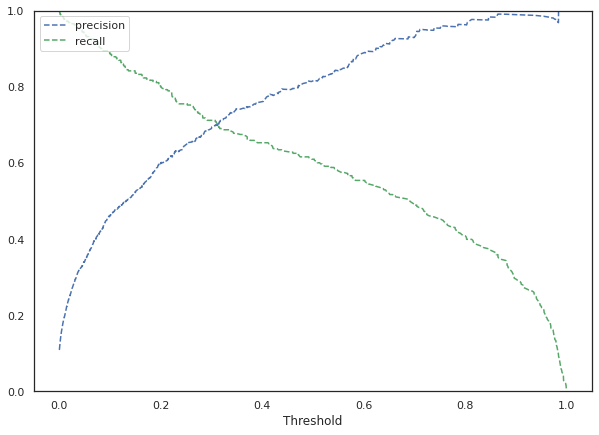

In [ ]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

# (Greatlearning Login)

* At threshold around 0.3 we will get equal precision and recall but taking a step back and selecting value around 0.28 will provide a higher recall and a good precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.28

# (Greatlearning Login)

**Checking model performance on training set**

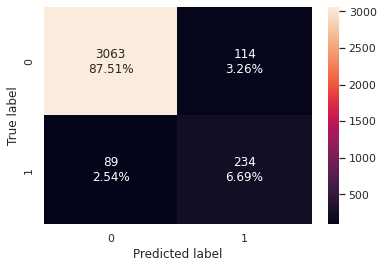

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

# (Greatlearning Login)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

# (Greatlearning Login)

Training performance:


Accuracy    Recall  Precision        F1
0     0.942  0.724458   0.672414  0.697466

* Recall has improved as compared to the initial model.
* Model with threshold as 0.28 was giving a better recall.

##**Model Performance Summary**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.27 Threshold",
    "Logistic Regression-0.3 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

# (Greatlearning Login)

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.27 Threshold  \
Accuracy                      0.951429                            0.893143   
Recall                        0.609907                            0.891641   
Precision                     0.817427                            0.459330   
F1                            0.698582                            0.606316   

           Logistic Regression-0.3 Threshold  
Accuracy                            0.942000  
Recall                              0.724458  
Precision                           0.672414  
F1                                  0.697466

##**Let's check the performance on the test set**

###**Using the model with default threshold**

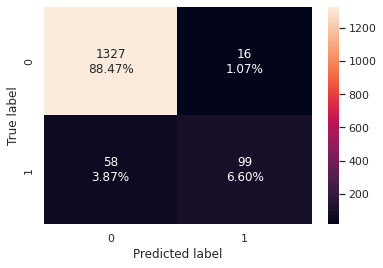

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

# (Greatlearning Login)

In [ ]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

# (Greatlearning Login)

Test set performance:


Accuracy    Recall  Precision        F1
0  0.950667  0.630573    0.86087  0.727941

* ROC-AUC on test set

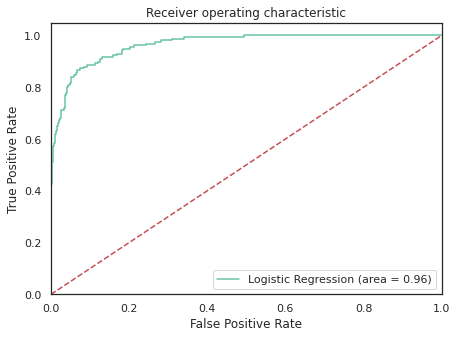

In [ ]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# (Greatlearning Login)

**Using the model with threshold of 0.28**

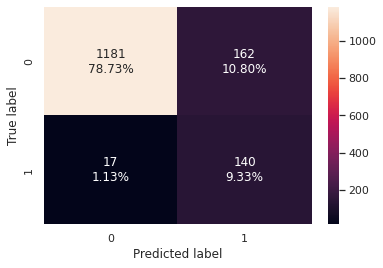

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

# (Greatlearning Login)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

# (Greatlearning Login)

Test set performance:


Accuracy   Recall  Precision        F1
0  0.880667  0.89172   0.463576  0.610022

**Using the model with threshold 0.3**

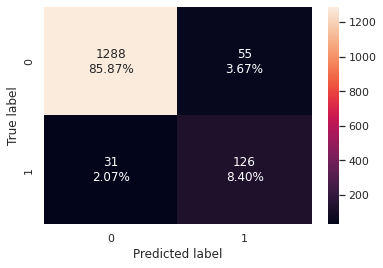

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

# (Greatlearning Login)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

# (Greatlearning Login)

Test performance:


Accuracy    Recall  Precision        F1
0  0.942667  0.802548   0.696133  0.745562

**Model performance comparison**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.28 Threshold",
    "Logistic Regression-0.3 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

# (Greatlearning Login)

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.28 Threshold  \
Accuracy                      0.951429                            0.893143   
Recall                        0.609907                            0.891641   
Precision                     0.817427                            0.459330   
F1                            0.698582                            0.606316   

           Logistic Regression-0.3 Threshold  
Accuracy                            0.942000  
Recall                              0.724458  
Precision                           0.672414  
F1                                  0.697466

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.28 Threshold",
    "Logistic Regression-0.3 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

# (Greatlearning Login)

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.28 Threshold  \
Accuracy                      0.950667                            0.880667   
Recall                        0.630573                            0.891720   
Precision                     0.860870                            0.463576   
F1                            0.727941                            0.610022   

           Logistic Regression-0.3 Threshold  
Accuracy                            0.942667  
Recall                              0.802548  
Precision                           0.696133  
F1                                  0.745562

#**Conclusion**
By changing the threshold of the logistic regression model we were able to see a significant improvement in the model performance.
The model achieved a recall of 0.89 on the training set with threshold set at 0.3.

#**Recommendations**
* From our logistic regression model we identified that CD_Account is a significant predictor of a customer accepting a personal loan.
* Bank should target customers with education of 1.5 years or less as they have greater chance to accept personal loan.
* We saw that customers with a family increase the odds of accepting a personal loan.
* According to our logistic regression model, AllLife Bank should target their marketing campaign toward customers with CD_Accounts, education of 1.5 years or less, and with family to increase chances of a personal loan being accepted.  

#**Comparing Decision Tree and Logistic Regression**

##**Conclude**

* After reviewing both decision tree and logistic regression classification tools I think the decision tree has the edge when it comes to specific reason for best choice.
* Both tools are great to have and give excellence insights for the business.


###**Key Takeaways**

1.	To predict whether a liability customer will buy a personal loan or not.
  * Criteria to campaign for personal loans according to decision tree model should depend on three main factors - Education, income, and family that is - If the Education is greater than 1.5 years, the income is greater than 110.5k, and family size is greater than 2.5 then the customer will not accept a personal loan. If the customer education is less than 1.5 years, income is less than 110.5k, and family size is less than 2.5 chances are that they will accept a personal loan.
2.	Which variables are most significant?
  * Education, Income, and Family (in that order) are the most important variables in determining if a customer will accept a personal loan.
3.	Which segment of customers should be targeted more?
  * Customers with Education levels less than 1.5 years should be our target
  * Income less than 110.5k are favorable customers who will accept personal loans
  * Family size of 2.5 are also favorable customers.

* My advice for the marketing team, both decision tree and logistic regression have ranked both variables education with less than 1.5 years and family size less than 2.5 high as key predictors.
* My advice on how to do this campaign would be target customers with income less than 110.5k, with education years of less than 1.5, family size less than 2.5, and customers with CD accounts.


##**Below are images of my decision tree and logistic regression comparison.**

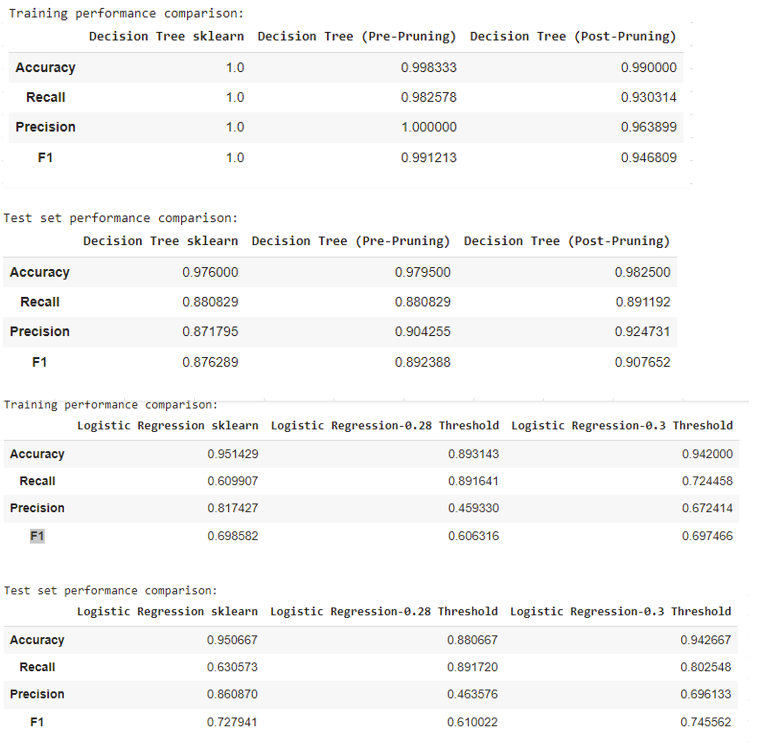

#**References**

Hu, Sanhe. Uszipcode: USA Zipcode Programmable Database, Includes 2020 Census Data and Geometry Information. MacOS, Microsoft :: Windows, Unix. PyPI, https://github.com/MacHu-GWU/. Accessed 26 July 2022.

Nishida, Kan. “Geocoding US Address Data with Zipcode Package & Visualize It.” Medium, 8 Feb. 2019, https://blog.exploratory.io/geocoding-us-zip-code-data-with-dplyr-and-zipcode-package-7f539c3702b0.

Greatlearning Login. https://olympus.mygreatlearning.com/login.

McKinney, Wes. Python for Data Analysis, Data Wrangling with Pandas, NumPy, and IPython. 2012. Second, O’Reilly, 2018.

“Region Map and Listing.” California Association of Local Behavioral Health Boards & Commissions, https://www.calbhbc.org/region-map-and-listing.html. Accessed 28 July 2022.

Personal Loan| Logistic Regression& Decision Tree. https://kaggle.com/code/yogidsba/personal-loan-logistic-regression-decision-tree. Accessed 26 July 2022.

